<a href="https://colab.research.google.com/github/matiasfabianlopez/DiploDatos-FCE-FAMAF-2025/blob/main/olist_cleaning_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?export=view&id=1fgnyPMe8s3Icw-FruVlrb0WjsIv7IcxJ" width="1000">

# A. Introducción

* Contexto del problema

* Objetivos del análisis/modelado

* Breve descripción y carga del dataset

## A.1 Estructura del espacio de trabajo (Drive)

In [ ]:
'''

proyecto_olist/
│
├── data/
│   ├── raw/      # Datos crudos originales (solo lectura)
│   ├── proc/     # Datos limpios y listos para análisis
│   └── out/      # Datos de salida
│
├── analysis/     # Exploración, análisis y prototipos
│
│
├── reports/      # Resultados y visualizaciones finales
│   └── figures/  # Gráficos y plots
│
└── docs/         # Documentación y metadatos

'''

'\n\nproyecto_olist/\n│\n├── data/\n│   ├── raw/      # Datos crudos originales (solo lectura)\n│   ├── proc/     # Datos limpios y listos para análisis\n│   └── out/      # Datos de salida\n│\n├── analysis/     # Exploración, análisis y prototipos\n│\n│\n├── reports/      # Resultados y visualizaciones finales\n│   └── figures/  # Gráficos y plots\n│\n└── docs/         # Documentación y metadatos\n\n'

## A.2 Carga de Librerias y Base de Datos


Como primer paso, se crearon copias de las bases de datos originales en nuestro propio entorno de trabajo, debido a que no contamos con control directo sobre las fuentes originales. Esto nos permite trabajar de forma independiente y garantizar la disponibilidad de los datos durante el análisis.

### A.2 Librerías

**📌¿Dónde conviene cargar las librerías en el notebook?**

Consideramos distintas opciones.  

---

## 🔹 Cargar todas las librerías al inicio

**Ventajas**:
* El notebook es más claro: desde el comienzo se ven todas las dependencias.  
* Si alguien más lo usa, puede instalar todo de una vez y ejecutar.  
* Es la práctica más común en notebooks “formales” (ej: papers, enseñanza, proyectos compartidos).  

**Desventajas**:
* Se cargan librerías que quizás no se usen en toda la ejecución
* El arranque es un poco más lento.  

**Recomendado para**:
* **Notebooks compartidos** (docencia, investigación, colaboración).  
* Un **pipeline completo** que se corre de principio a fin.  

---

## 🔹 Cargar librerías en cada sección

**Ventajas**:
* Cada bloque/sección es **autosuficiente**: no depende de haber corrido celdas anteriores.  
* Útil para hacer prototipado, pruebas rápidas o modularidad.  

**Desventajas**:
* Se repiten imports en distintas partes del notebook.  
* El notebook se ve más desordenado.  
* Quien lo use puede no saber todas las dependencias hasta que aparezca un error.  

**Recomendado para**:
* **Exploración** o testing rápido.  
* Muy modular, con secciones que se ejecutan por separado.  

---

## 🔹 Estrategia mixta

1. **Al inicio**: cargar las librerías principales (ej: `numpy`, `pandas`, `matplotlib`).  
2. **En secciones específicas**: cargar librerías muy puntuales que solo se usan ahí (ej: `geopandas`, `seaborn`, `sklearn`).  

**Decisión de nuestro grupo**

En la etapa actual, vamos a cargar las librerías de manera Mixta. Esto nos permite:

- Mantener la independencia entre bloques.

- Facilitar el trabajo modular, pruebas y desarrollo de cada sección de manera autónoma.

Sin embargo, nuestro objetivo a mediano plazo es migrar hacia cargar todas las librerías principales al inicio del notebook

In [ ]:
## Librerias

# Manejo de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Modelado
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler


## A.3 Caracterizacion de las bases de datos

Como primer paso, decidimos evaluar las tablas que componen el dataframe de Olist para comprender qué datos contienen y definir posibles objetivos basados en las conclusiones obtenidas.

Caracterización: Base de datos de comercio electrónico brasileño de pedidos realizados en la tienda Olist. Contiene información de 100.000 pedidos realizados entre 2016 y 2018 en varios mercados en Brasil.

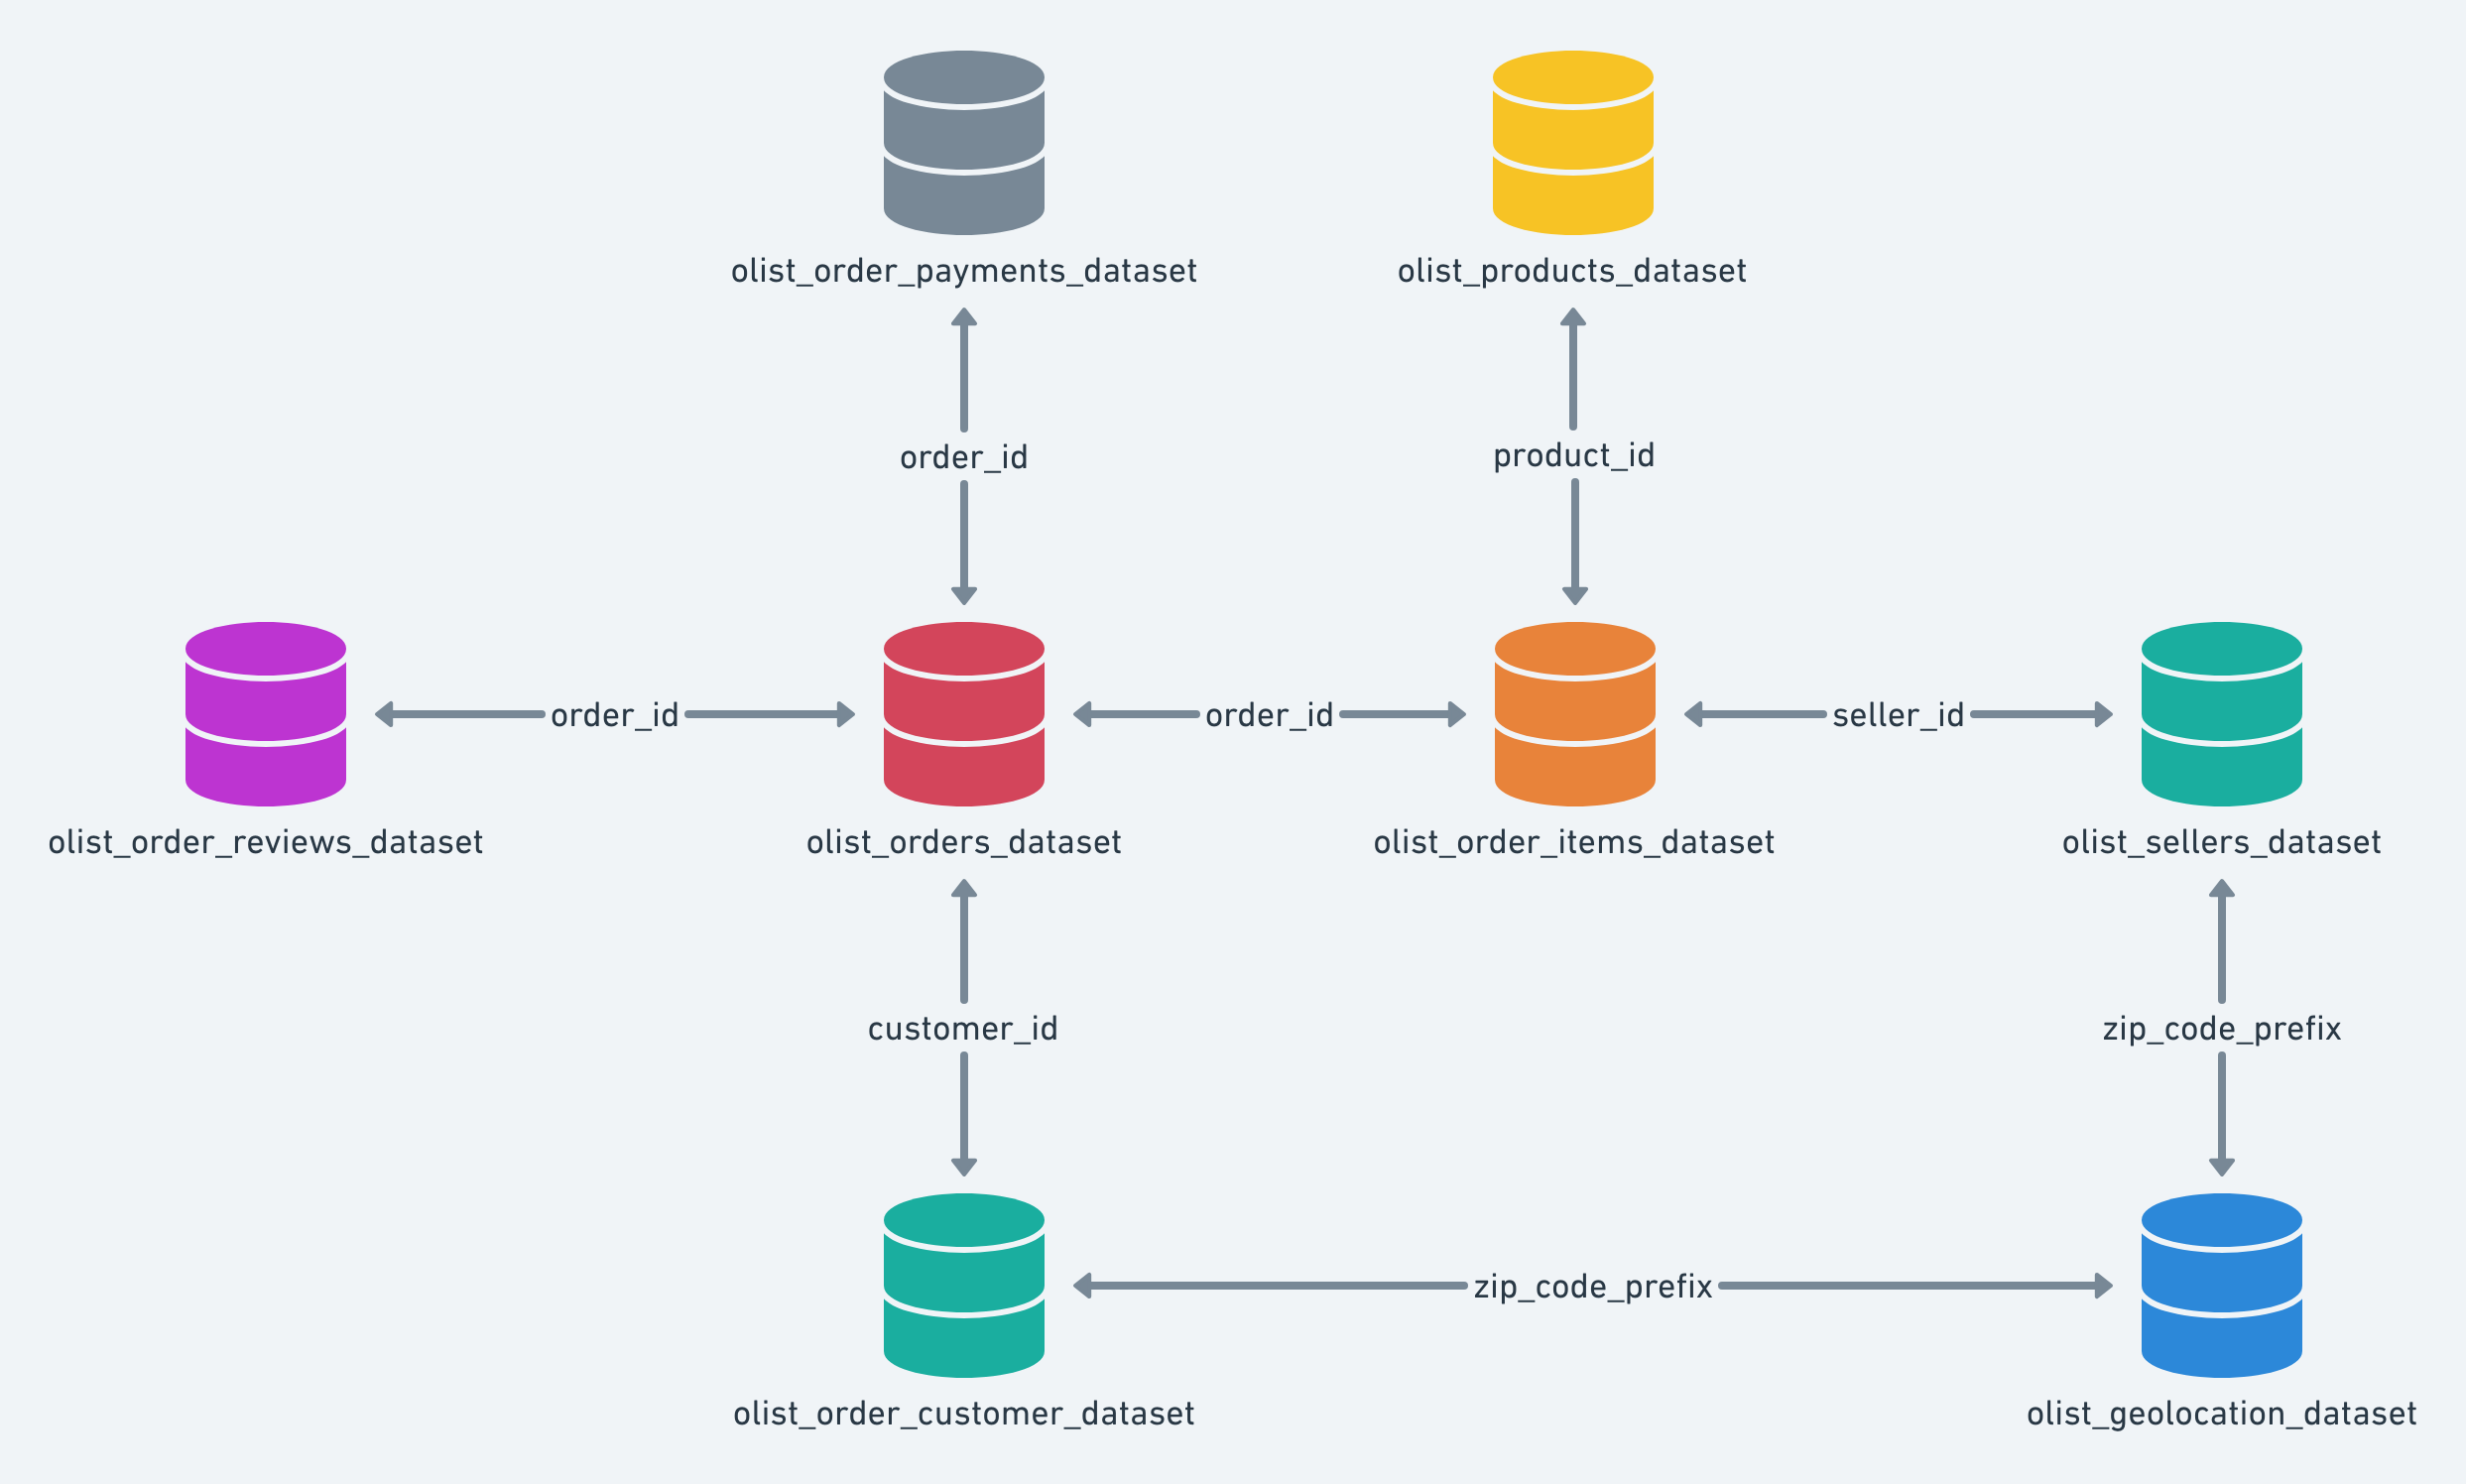

In [ ]:
#Customers

url = 'https://docs.google.com/spreadsheets/d/1EclNnYRCqOXYVXF1h5FPicHoL02GJplS/edit?usp=sharing&ouid=109492032071319546407&rtpof=true&sd=true'

path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]

customers = pd.read_excel(path)
customers.drop(columns='Unnamed: 0', inplace=True)

print(customers.info())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None




In [ ]:
#Orders

url = 'https://docs.google.com/spreadsheets/d/1ihv6Ioz9Uyo0AQenlS3JUdea0U-wGXia/edit?usp=sharing&ouid=110630083054283542957&rtpof=true&sd=true'

path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]

orders = pd.read_excel(path)
orders.drop(columns='Unnamed: 0', inplace=True)

print(orders.info())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None




In [ ]:
#Order Items

url = 'https://docs.google.com/spreadsheets/d/1COVs5tQ-wXM-X9-ZzyUtg0V2pzExhV8M/edit?usp=sharing&ouid=110630083054283542957&rtpof=true&sd=true'

path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]

order_items = pd.read_excel(path)
order_items.drop(columns='Unnamed: 0', inplace=True)

print(order_items.info())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None




In [ ]:
#Order Payments

url = 'https://docs.google.com/spreadsheets/d/1DxdYSwng1bJTQ5R-bQeMZex4PrPUqGqL/edit?usp=sharing&ouid=109492032071319546407&rtpof=true&sd=true'

path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]

order_payments = pd.read_excel(path)
order_payments.drop(columns='Unnamed: 0', inplace=True)

print(order_payments.info())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None




In [ ]:
#Order Reviews

url = 'https://docs.google.com/spreadsheets/d/17c0zGjWEBi3jD44v5c_1fSeXK5Ib3xWd/edit?usp=sharing&ouid=109492032071319546407&rtpof=true&sd=true'

path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]

order_reviews = pd.read_excel(path)
order_reviews.drop(columns='Unnamed: 0', inplace=True)

print(order_reviews.info())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None




In [ ]:
#Sellers

url = 'https://docs.google.com/spreadsheets/d/1KxjWNQhfchFwwFXCP5KI7VpbINyttazN/edit?usp=sharing&ouid=109492032071319546407&rtpof=true&sd=true'

path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]

sellers = pd.read_excel(path)
sellers.drop(columns='Unnamed: 0', inplace=True)

print(sellers.info())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None




In [ ]:
#Products

url = 'https://docs.google.com/spreadsheets/d/1FaZgDI-PMgu5peGPAQttSKRP3Xy3SsaS/edit?usp=sharing&ouid=110630083054283542957&rtpof=true&sd=true'

path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]

products = pd.read_excel(path)
products.drop(columns='Unnamed: 0', inplace=True)

print(products.info())
print('\n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None




In [ ]:
#Geolocation

# ID del archivo en Drive
file_id = '1eUTiqoa2g8pQZrYzGgIjlG1KnkycX7rI'

# Enlace de descarga directa
csv_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Leer el CSV
geolocation = pd.read_csv(csv_url)

# Ver info del DataFrame
print(geolocation.info())
geolocation.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


# B. Limpieza y exploración de Datos

* Revisión de valores faltantes, duplicados, outliers

* Estadísticas descriptivas

* Visualizaciones iniciales



## B.1 PAYMENT

In [ ]:
## Primero verificar que cada pedido no tenga nmas de 1 forma de pago

# Contar cuántos tipos de pago distintos tiene cada order_id
order_payments['num_tipos_pago'] = order_payments.groupby('order_id')['payment_type'].transform('nunique')

# Ver los pedidos que tienen más de 2 tipos de pago distintos
pedidos_multiples_tipos = order_payments[order_payments['num_tipos_pago'] > 2]

# Mostrar algunos resultados
print(pedidos_multiples_tipos[['order_id', 'payment_type', 'num_tipos_pago']].drop_duplicates())

## Teniendo en cuenta esto, es seguro colapsar el DF a nivel oredr_id, sin perder información de order_payment

Empty DataFrame
Columns: [order_id, payment_type, num_tipos_pago]
Index: []


In [ ]:
# Antes de colpasar, contar la cantidad de pagos para cada order_id

# Contar cuántas veces aparece cada order_id
conteo = order_payments['order_id'].value_counts()

# Mostrar los order_id que se repiten (aparecen más de una vez)
repetidos = conteo[conteo > 1]
print(repetidos)

# Opcional: ver solo los primeros 10
print(repetidos.head(10))



order_id
fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
fedcd9f7ccdc8cba3a18defedd1a5547    19
                                    ..
fccf0d3397491d555ae0d9a4689bfc29     2
65f72c812ba4ca1ebb3c3558c69d5693     2
47cb859a7f526319e3da0015c15c3b1f     2
a4291e3f3a5a6350fb7624dc6a892bce     2
84ebcff41a92fda70c984a3ef76d1237     2
Name: count, Length: 2961, dtype: int64
order_id
fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
fedcd9f7ccdc8cba3a18defedd1a5547    19
ee9ca989fc93ba09a6eddc250ce01742    19
21577126c19bf11a0b91592e5844ba78    15
4bfcba9e084f46c8e3cb49b0fa6e6159    15
3c58bffb70dcf45f12bdf66a3c215905    14
4689b1816de42507a7d63a4617383c59    14
Name: count, dtype: int64


In [ ]:
# Crear una columna que indique la cantidad de pagos distintos por pedido
order_payments['num_pagos'] = order_payments.groupby('order_id')['payment_sequential'].transform('nunique')

# Ver cómo quedó para un order_id específico
order_payments[order_payments['order_id'] == 'fa65dad1b0e818e3ccc5cb0e39231352']



,order_id,payment_sequential,payment_type,payment_installments,payment_value,num_tipos_pago,num_pagos
4885,fa65dad1b0e818e3ccc5cb0e39231352,27,voucher,1,66.02,1,29
9985,fa65dad1b0e818e3ccc5cb0e39231352,4,voucher,1,29.16,1,29
14321,fa65dad1b0e818e3ccc5cb0e39231352,1,voucher,1,3.71,1,29
17274,fa65dad1b0e818e3ccc5cb0e39231352,9,voucher,1,1.08,1,29
19565,fa65dad1b0e818e3ccc5cb0e39231352,10,voucher,1,12.86,1,29
23074,fa65dad1b0e818e3ccc5cb0e39231352,2,voucher,1,8.51,1,29
24879,fa65dad1b0e818e3ccc5cb0e39231352,25,voucher,1,3.68,1,29
28330,fa65dad1b0e818e3ccc5cb0e39231352,5,voucher,1,0.66,1,29
29648,fa65dad1b0e818e3ccc5cb0e39231352,6,voucher,1,5.02,1,29
32519,fa65dad1b0e818e3ccc5cb0e39231352,11,voucher,1,4.03,1,29


In [ ]:
# Agrupar a nivel pedido
order_payments_filt = order_payments.groupby('order_id').agg(
    total_pago=('payment_value', 'sum'),
    num_pagos=('num_pagos', 'first'),
    payment_type=('payment_type', 'first'),
    cuotas=('payment_installments', 'max')  # máxima cantidad de cuotas usada
).reset_index()


# Ver los primeros registros
order_payments_filt.head()


,order_id,total_pago,num_pagos,payment_type,cuotas
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,1,credit_card,2
1,00018f77f2f0320c557190d7a144bdd3,259.83,1,credit_card,3
2,000229ec398224ef6ca0657da4fc703e,216.87,1,credit_card,5
3,00024acbcdf0a6daa1e931b038114c75,25.78,1,credit_card,2
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,1,credit_card,3


In [ ]:
# Resumen básico: conteo de cada valor de payment_installments
resumen_cuotas = order_payments_filt['cuotas'].value_counts().sort_index()
print("Número de pagos por cantidad de cuotas:")
print(resumen_cuotas)

# Opcional: porcentaje respecto al total de pagos
porcentaje_cuotas = (order_payments_filt['cuotas'].value_counts(normalize=True) * 100).sort_index()
print("\nPorcentaje de pagos por cantidad de cuotas:")
print(porcentaje_cuotas)


Número de pagos por cantidad de cuotas:
cuotas
0         2
1     48268
2     12363
3     10429
4      7070
5      5227
6      3908
7      1622
8      4251
9       644
10     5315
11       23
12      133
13       16
14       15
15       74
16        5
17        8
18       27
20       17
21        3
22        1
23        1
24       18
Name: count, dtype: int64

Porcentaje de pagos por cantidad de cuotas:
cuotas
0      0.002011
1     48.539823
2     12.432623
3     10.487731
4      7.109815
5      5.256436
6      3.930008
7      1.631134
8      4.274940
9      0.647627
10     5.344932
11     0.023130
12     0.133749
13     0.016090
14     0.015084
15     0.074417
16     0.005028
17     0.008045
18     0.027152
20     0.017096
21     0.003017
22     0.001006
23     0.001006
24     0.018101
Name: proportion, dtype: float64


In [ ]:
# Filtrar los pedidos con cuotas igual a 0
pedidos_cuotas_0 = order_payments_filt[order_payments_filt['cuotas'] == 0]

# Verlos
print(pedidos_cuotas_0)


                               order_id  total_pago  num_pagos payment_type  \
10244  1a57108394169c0b47d8f876acc9ba2d      129.94          1  credit_card   
45168  744bade1fcf9ff3f31d860ace076d422       58.69          1  credit_card   

       cuotas  
10244       0  
45168       0  


<h2 style="margin-top:0; margin-bottom:0;">Datos Atípicos </h2>

Se identificaron 2 pedidos con cuotas = 0 de todo el dataset, por lo que son casos muy minoritarios.

Causas posibles

* Error en el registro de los pagos: Tal vez el sistema no guardó la información de cuotas correctamente.

* Pagos especiales: Algunos sistemas registran ciertos tipos de pago (como transferencia directa o ajustes internos) con 0 cuotas.

* Pedidos muy pequeños o manuales: En algunos marketplaces, ajustes o reembolsos se registran con cuotas = 0.

Opciones de manejo

1. Corregir a 1 cuota: Más conservador y práctico, ya que normalmente un pago de tarjeta o crédito tiene al menos 1 cuota.

2. Dejar como está: Documentando como caso atípico; su impacto en el análisis general es mínimo.

3. Eliminar los pedidos: Solo si se desea excluir valores atípicos en análisis de cuotas.

**Decisión** Dado que solo son dos casos y los montos son bajos, se decide reemplazar 0 por 1, para mantener la consistencia del dataset y conservar los pedidos en el análisis.



In [ ]:
# Verificar cuántos pedidos tienen cuotas = 0
print("Pedidos con cuotas = 0 antes del reemplazo:")
print(order_payments_filt[order_payments_filt['cuotas'] == 0])

# Reemplazar 0 por 1 en la columna 'cuotas'
order_payments_filt['cuotas'] = order_payments_filt['cuotas'].replace(0, 1)

# Verificar que ya no quedan casos con cuotas = 0
print("\nPedidos con cuotas = 0 después del reemplazo:")
print(order_payments_filt[order_payments_filt['cuotas'] == 0])


Pedidos con cuotas = 0 antes del reemplazo:
                               order_id  total_pago  num_pagos payment_type  \
10244  1a57108394169c0b47d8f876acc9ba2d      129.94          1  credit_card   
45168  744bade1fcf9ff3f31d860ace076d422       58.69          1  credit_card   

       cuotas  
10244       0  
45168       0  

Pedidos con cuotas = 0 después del reemplazo:
Empty DataFrame
Columns: [order_id, total_pago, num_pagos, payment_type, cuotas]
Index: []


In [ ]:
## Guardar el archivo
from google.colab import files

order_payments_filt.to_csv('olist_order_payment_dataset_filt.csv', index=False)

files.download("olist_order_payment_dataset_filt.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

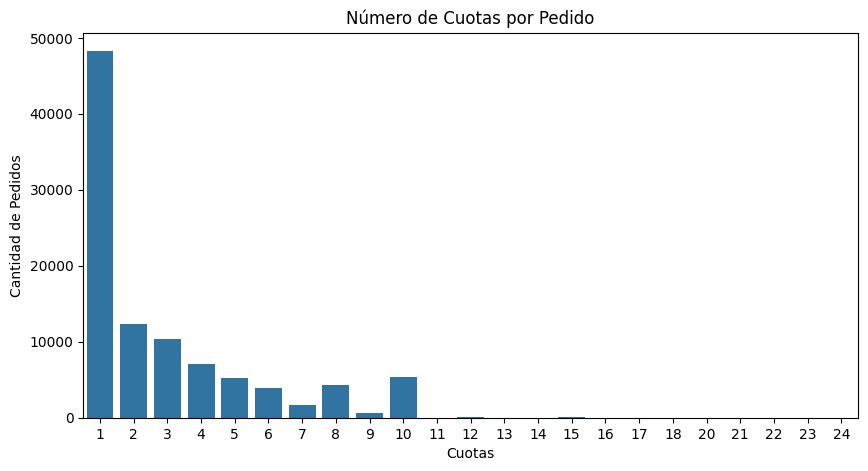

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(x='cuotas', data=order_payments_filt)
plt.title("Número de Cuotas por Pedido")
plt.xlabel("Cuotas")
plt.ylabel("Cantidad de Pedidos")
plt.show()


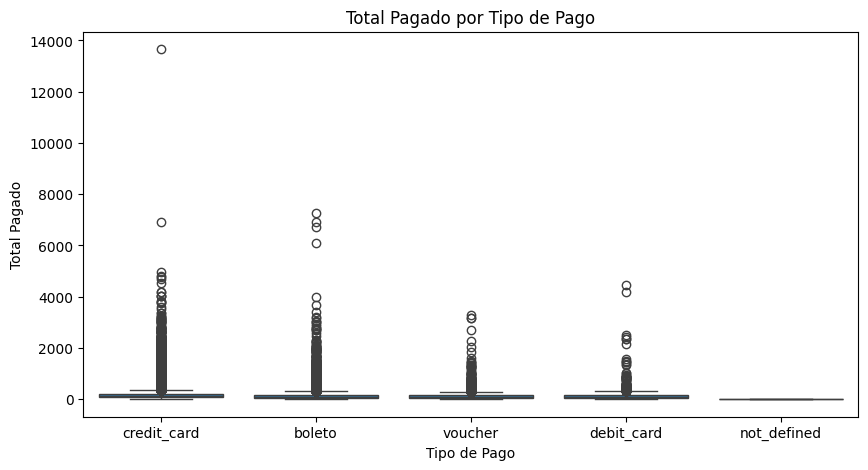

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='payment_type', y='total_pago', data=order_payments_filt)
plt.title("Total Pagado por Tipo de Pago")
plt.xlabel("Tipo de Pago")
plt.ylabel("Total Pagado")
plt.show()

/tmp/ipython-input-2748108560.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pagos_individuales.index, y=pagos_individuales.values, palette="viridis")


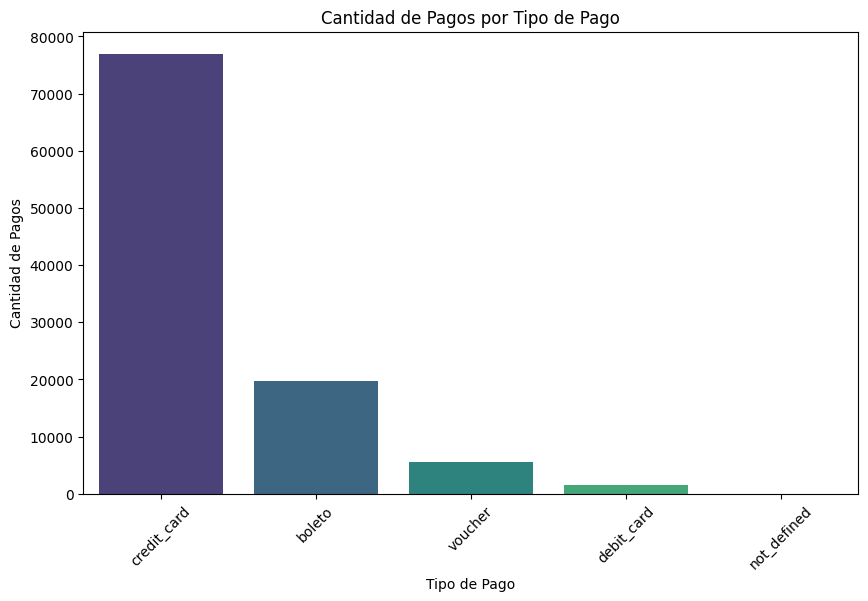

In [ ]:
# Sumar la cantidad de pagos individuales por tipo de pago
pagos_individuales = order_payments_filt.groupby('payment_type')['num_pagos'].sum().sort_values(ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=pagos_individuales.index, y=pagos_individuales.values, palette="viridis")
plt.title("Cantidad de Pagos por Tipo de Pago")
plt.xlabel("Tipo de Pago")
plt.ylabel("Cantidad de Pagos")
plt.xticks(rotation=45)
plt.show()

Número de pedidos por cantidad de cuotas (crédito):
cuotas
1     24577
2     12252
3     10357
4      7026
5      5196
6      3881
7      1611
8      4235
9       640
10     5274
11       23
12      132
13       16
14       14
15       73
16        5
17        8
18       27
20       17
21        3
22        1
23        1
24       18
Name: count, dtype: int64

Porcentaje de pedidos por cantidad de cuotas (crédito):
cuotas
1     32.601112
2     16.252139
3     13.738443
4      9.319909
5      6.892435
6      5.148102
7      2.136973
8      5.617679
9      0.848953
10     6.995901
11     0.030509
12     0.175097
13     0.021224
14     0.018571
15     0.096834
16     0.006632
17     0.010612
18     0.035815
20     0.022550
21     0.003979
22     0.001326
23     0.001326
24     0.023877
Name: proportion, dtype: float64


/tmp/ipython-input-1745511800.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resumen_cuotas_credito.index, y=resumen_cuotas_credito.values, palette="Blues_d")


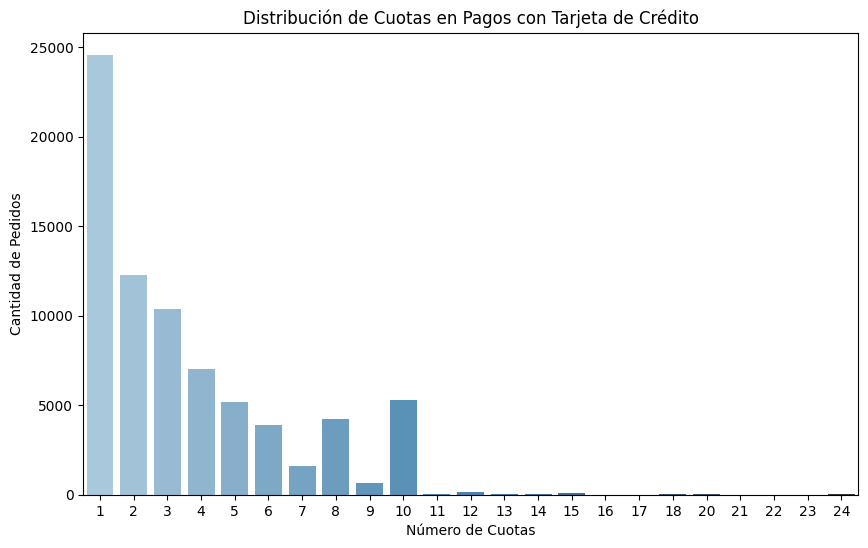

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo pagos con tarjeta de crédito
pagos_credito = order_payments_filt[order_payments_filt['payment_type'] == 'credit_card']

# Ver resumen de cuotas
resumen_cuotas_credito = pagos_credito['cuotas'].value_counts().sort_index()
print("Número de pedidos por cantidad de cuotas (crédito):")
print(resumen_cuotas_credito)

# Porcentaje respecto al total
porcentaje_cuotas_credito = (pagos_credito['cuotas'].value_counts(normalize=True) * 100).sort_index()
print("\nPorcentaje de pedidos por cantidad de cuotas (crédito):")
print(porcentaje_cuotas_credito)

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=resumen_cuotas_credito.index, y=resumen_cuotas_credito.values, palette="Blues_d")
plt.title("Distribución de Cuotas en Pagos con Tarjeta de Crédito")
plt.xlabel("Número de Cuotas")
plt.ylabel("Cantidad de Pedidos")
plt.show()

In [ ]:
# Filtrar pedidos con payment_type 'not_defined'
pedidos_not_defined = order_payments_filt[order_payments_filt['payment_type'] == 'not_defined']

# Ver los resultados
print(pedidos_not_defined)

                               order_id  total_pago  num_pagos payment_type  \
251    00b1cb0320190ca0daa2c88b35206009         0.0          1  not_defined   
27282  4637ca194b6387e2d538dc89b124b0ee         0.0          1  not_defined   
78007  c8c528189310eaa44a745b8d9d26908b         0.0          1  not_defined   

       cuotas  
251         1  
27282       1  
78007       1  


## B.2 REVIEWS

In [ ]:
order_reviews.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
## Convertir fechas a datetime

order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date'])
order_reviews['review_answer_timestamp'] = pd.to_datetime(order_reviews['review_answer_timestamp'])


In [ ]:
order_reviews['review_score'].value_counts(normalize=True) * 100


,proportion
review_score,
5,57.776344
4,19.291704
1,11.513344
3,8.242965
2,3.175643


In [ ]:
with_comment = order_reviews[order_reviews_filt['review_comment_message'].notnull()]
without_comment = order_reviews[order_reviews_filt['review_comment_message'].isnull()]


📊 Resumen general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB
None


🔸 Valores nulos por columna:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_

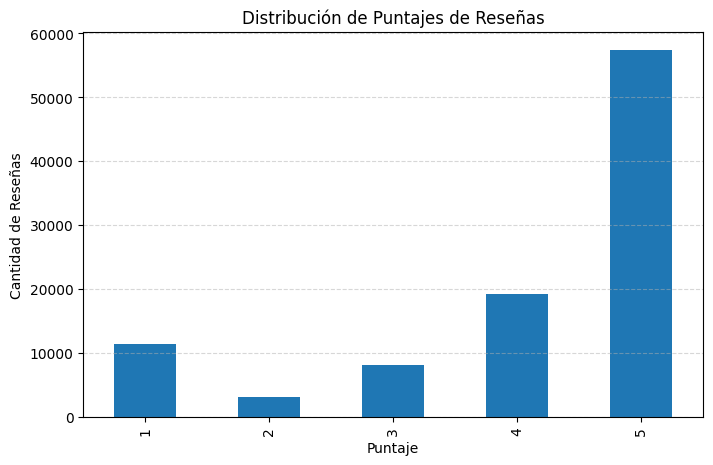

💬 Reseñas con comentarios: 40977
❌ Reseñas sin comentarios: 58247
📊 Porcentaje con comentarios: 41.3%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Convertir fechas a datetime ---
order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date'])
order_reviews['review_answer_timestamp'] = pd.to_datetime(order_reviews['review_answer_timestamp'])

# --- 2. Resumen general del DataFrame ---
print("📊 Resumen general del DataFrame:")
print(order_reviews.info())
print("\n")

# --- 3. Conteo de valores nulos por columna ---
print("🔸 Valores nulos por columna:")
print(order_reviews.isnull().sum())
print("\n")

# --- 4. Distribución de las calificaciones ---
print("⭐ Distribución de review_score:")
print(order_reviews['review_score'].value_counts().sort_index())
print("\n")

# --- 5. Distribución de calificaciones en porcentaje ---
print("📈 Distribución de review_score en %:")
print(round(order_reviews['review_score'].value_counts(normalize=True).sort_index() * 100, 2))
print("\n")

# --- 6. Gráfico de barras de review_score ---
plt.figure(figsize=(8,5))
order_reviews_filt['review_score'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de Puntajes de Reseñas')
plt.xlabel('Puntaje')
plt.ylabel('Cantidad de Reseñas')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# --- 7. Reseñas con y sin comentarios ---
with_comment = order_reviews[order_reviews_filt['review_comment_message'].notnull()]
without_comment = order_reviews[order_reviews_filt['review_comment_message'].isnull()]

print(f"💬 Reseñas con comentarios: {len(with_comment)}")
print(f"❌ Reseñas sin comentarios: {len(without_comment)}")
print(f"📊 Porcentaje con comentarios: {round(len(with_comment)/len(order_reviews)*100, 2)}%")


📊 Distribución de reseñas con/sin comentario por puntaje:
has_comment   False  True 
review_score              
1              2679   8745
2              1006   2145
3              4622   3557
4             13166   5976
5             36774  20554

📈 Distribución en %:
has_comment   False  True 
review_score              
1             23.45  76.55
2             31.93  68.07
3             56.51  43.49
4             68.78  31.22
5             64.15  35.85


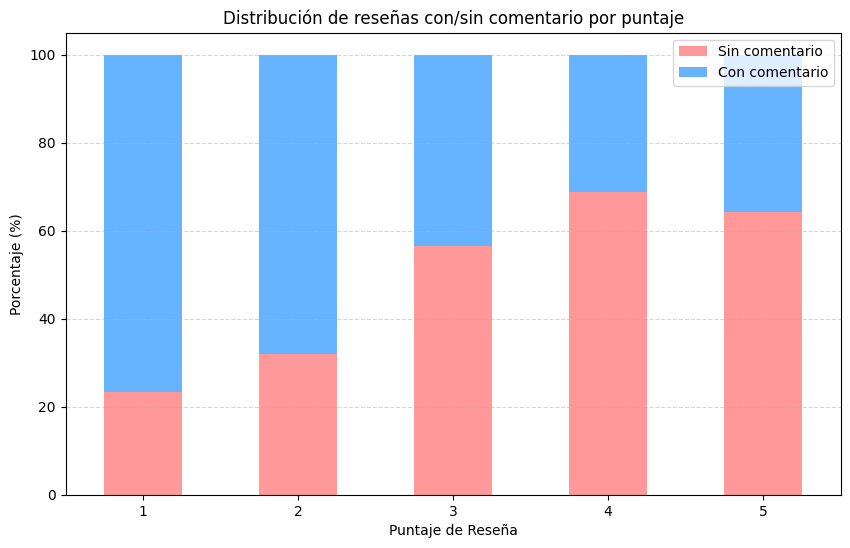

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear columna auxiliar que indique si hay comentario o no
order_reviews['has_comment'] = order_reviews['review_comment_message'].notnull()

# Agrupar por puntaje y si hay comentario
review_comment_dist = order_reviews.groupby(['review_score', 'has_comment']).size().unstack(fill_value=0)

# Calcular porcentajes por review_score
review_comment_dist_percent = review_comment_dist.div(review_comment_dist.sum(axis=1), axis=0) * 100

print("📊 Distribución de reseñas con/sin comentario por puntaje:")
print(review_comment_dist)
print("\n📈 Distribución en %:")
print(round(review_comment_dist_percent, 2))

# --- Gráfico de barras apiladas ---
ax = review_comment_dist_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    color=['#ff9999', '#66b3ff']
)

plt.title('Distribución de reseñas con/sin comentario por puntaje')
plt.xlabel('Puntaje de Reseña')
plt.ylabel('Porcentaje (%)')
plt.legend(['Sin comentario', 'Con comentario'], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.show()


Los extremos comentan...

In [ ]:
# 1) Crear has_comment (0/1) a partir de review_comment_message
order_reviews['has_comment'] = (
    order_reviews['review_comment_message']
    .fillna('')           # reemplaza NaN por string vacío
    .str.strip()          # quita espacios en los extremos
    .ne('')               # True si la cadena no es vacía
    .astype(int)          # 1 (tiene texto) o 0 (no tiene)
)

# Opcional: considerar también el título del comentario
order_reviews['has_comment_title'] = (
    order_reviews['review_comment_title']
    .fillna('')
    .str.strip()
    .ne('')
    .astype(int)
)

# Crear una columna que indica si existe algún tipo de comentario (título o mensaje)
order_reviews['has_any_comment'] = (
    (order_reviews['has_comment'] | order_reviews['has_comment_title']).astype(int)
)

# 2) Verificaciones rápidas
print("Conteo 0/1 en has_comment:")
print(order_reviews['has_comment'].value_counts())
print("\nProporción con comentario (has_comment):", order_reviews['has_comment'].mean())

print("\nTabla cruzada review_score vs has_comment:")
print(pd.crosstab(order_reviews['review_score'], order_reviews['has_comment'], margins=True))


Conteo 0/1 en has_comment:
has_comment
0    58274
1    40950
Name: count, dtype: int64

Proporción con comentario (has_comment): 0.41270257195839716

Tabla cruzada review_score vs has_comment:
has_comment       0      1    All
review_score                     
1              2680   8744  11424
2              1006   2145   3151
3              4623   3556   8179
4             13172   5970  19142
5             36793  20535  57328
All           58274  40950  99224


  year_month  avg_review_score
0    2016-10          4.055866
1    2016-11          3.188119
2    2016-12          2.355556
3    2017-01          4.338912
4    2017-02          4.280962


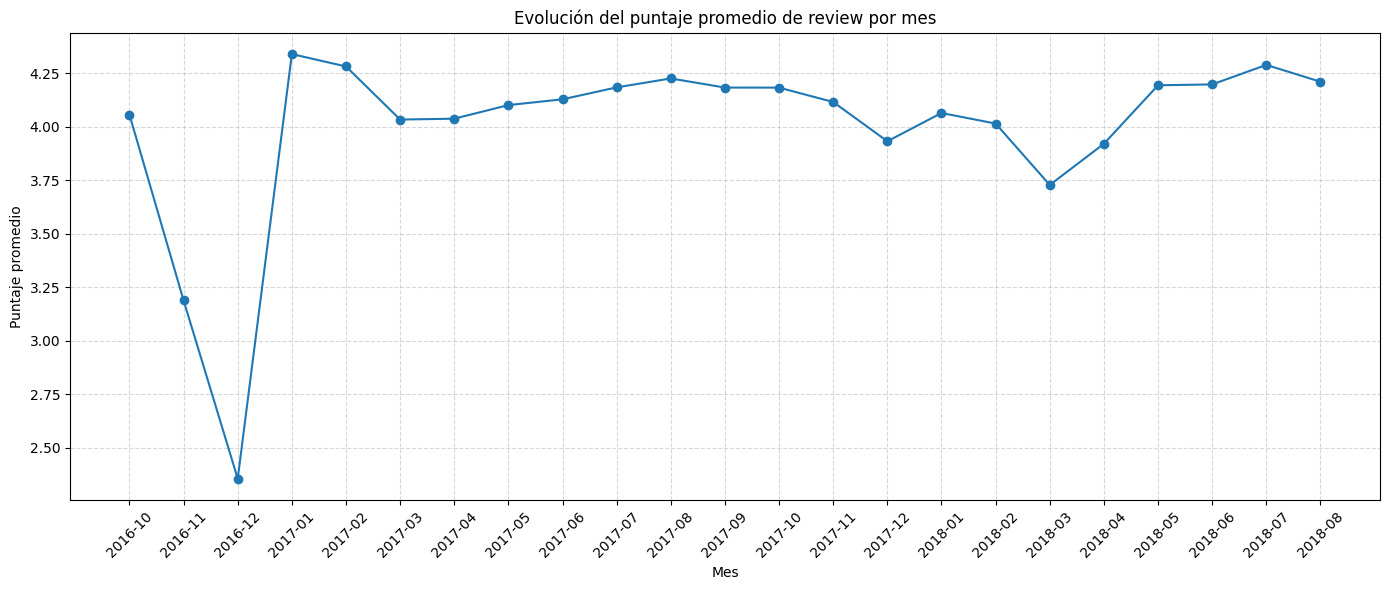

In [ ]:
order_reviews['year_month'] = order_reviews['review_creation_date'].dt.to_period('M').astype(str)

monthly_review = order_reviews.groupby('year_month')['review_score'].mean().reset_index()
monthly_review.rename(columns={'review_score': 'avg_review_score'}, inplace=True)

print(monthly_review.head())

import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(monthly_review['year_month'], monthly_review['avg_review_score'], marker='o')
plt.xticks(rotation=45)
plt.title('Evolución del puntaje promedio de review por mes')
plt.xlabel('Mes')
plt.ylabel('Puntaje promedio')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



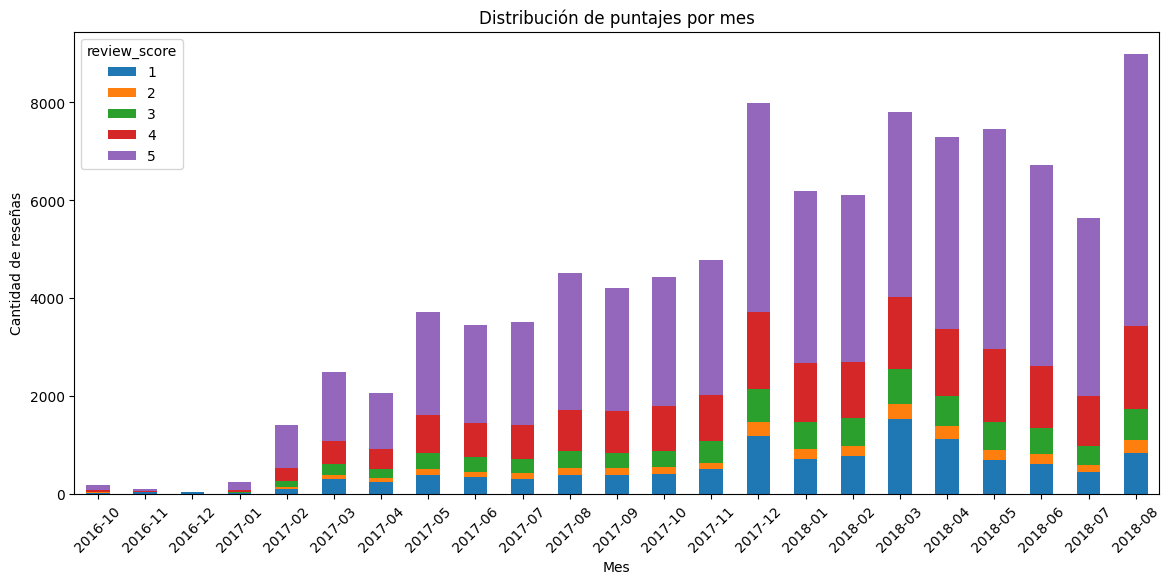

In [ ]:
order_reviews.groupby(['year_month', 'review_score']).size().unstack().plot(
    kind='bar', stacked=True, figsize=(14,6)
)
plt.title('Distribución de puntajes por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de reseñas')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Calcular tiempo de respuesta
order_reviews['response_time_days'] = (
    order_reviews['review_answer_timestamp'] - order_reviews['review_creation_date']
).dt.total_seconds() / (3600*24)  # convertir segundos a días

# Revisar valores
print(order_reviews[['review_creation_date', 'review_answer_timestamp', 'response_time_days']].head())
print("\nResumen estadístico:")
print(order_reviews_filt['response_time_days'].describe())

  review_creation_date review_answer_timestamp  response_time_days
0           2018-01-18     2018-01-18 21:46:59            0.907627
1           2018-03-10     2018-03-11 03:05:13            1.128623
2           2018-02-17     2018-02-18 14:36:24            1.608611
3           2017-04-21     2017-04-21 22:02:06            0.918125
4           2018-03-01     2018-03-02 10:26:53            1.435336

Resumen estadístico:
count    99224.000000
mean         3.148993
std          9.890049
min          0.089225
25%          1.004870
50%          1.674948
75%          3.103565
max        518.699213
Name: response_time_days, dtype: float64


In [ ]:
# Ejemplo de categorías
bins = [0, 1, 3, 7, 30, 365]
labels = ['<1d', '1-3d', '3-7d', '7-30d', '>30d']

order_reviews['response_time_category'] = pd.cut(
    order_reviews['response_time_days'], bins=bins, labels=labels, right=False
)

print(order_reviews['response_time_category'].value_counts())



response_time_category
1-3d     46893
<1d      24361
3-7d     23056
7-30d     4232
>30d       672
Name: count, dtype: int64


response_time_category
<1d      3.886663
1-3d     4.172222
3-7d     4.137968
7-30d    4.002836
>30d     4.095238
Name: review_score, dtype: float64


/tmp/ipython-input-3640051259.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  response_vs_score = order_reviews_filt.groupby('response_time_category')['review_score'].mean()


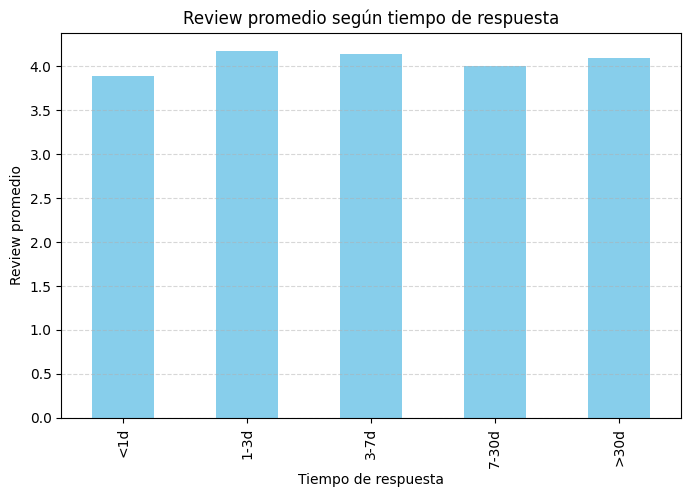

In [ ]:
# Promedio de review por categoría de tiempo de respuesta
response_vs_score = order_reviews_filt.groupby('response_time_category')['review_score'].mean()
print(response_vs_score)

# Gráfico
response_vs_score.plot(kind='bar', figsize=(8,5), color='skyblue', title='Review promedio según tiempo de respuesta')
plt.xlabel('Tiempo de respuesta')
plt.ylabel('Review promedio')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [ ]:
from google.colab import files

# Guardar DataFrame en CSV
order_reviews.to_csv('olist_order_reviews_dataset_filt.csv', index=False)

# Descargarlo a tu computadora
files.download('olist_order_reviews_dataset_filt.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## B.3 GEOLOCATION

## Objetivo general:
Asignar coordenadas geográficas (lat, lng) promedio a clientes (customers) y vendedores (sellers), usando un conjunto de datos de geolocalización agrupado por prefijo de código postal (zip_code_prefix).
Reduce la tabla de geolocalización a un solo punto promedio por código postal.
Asocia esos puntos geográficos a cada cliente y vendedor.
Prepara los datos para análisis geoespacial, como:
* calcular distancias,
* hacer mapas,
* agrupar por regiones, etc.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [ ]:
#Customers

url = 'https://docs.google.com/spreadsheets/d/1EclNnYRCqOXYVXF1h5FPicHoL02GJplS/edit?usp=sharing&ouid=109492032071319546407&rtpof=true&sd=true'

path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]

customers = pd.read_excel(path)
customers.drop(columns='Unnamed: 0', inplace=True)

print(customers.info())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None




In [ ]:
#Sellers

url = 'https://docs.google.com/spreadsheets/d/1KxjWNQhfchFwwFXCP5KI7VpbINyttazN/edit?usp=sharing&ouid=109492032071319546407&rtpof=true&sd=true'

path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]

sellers = pd.read_excel(path)
sellers.drop(columns='Unnamed: 0', inplace=True)

print(sellers.info())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None




In [ ]:
#Geolocation

# ID del archivo en Drive
file_id = '1eUTiqoa2g8pQZrYzGgIjlG1KnkycX7rI'

# Enlace de descarga directa
csv_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Leer el CSV
geolocation = pd.read_csv(csv_url)

# Ver info del DataFrame
print(geolocation.info())
geolocation.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


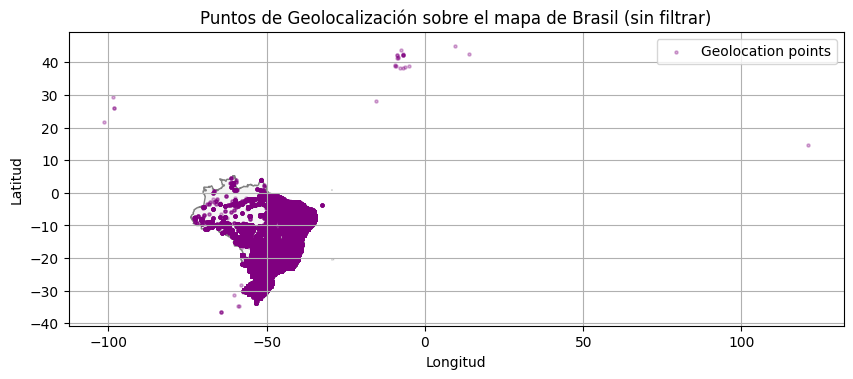

In [ ]:
# Leer el mapa del mundo y filtrar Brasil
url = 'https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson'
world = gpd.read_file(url)
brasil = world[world['name'] == 'Brazil']

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 10))
brasil.plot(ax=ax, color='whitesmoke', edgecolor='gray')

# Agregar puntos de geolocation
plt.scatter(geolocation['geolocation_lng'], geolocation['geolocation_lat'],
            color='purple', label='Geolocation points', alpha=0.3, s=5)

plt.title('Puntos de Geolocalización sobre el mapa de Brasil (sin filtrar)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Convertir geolocation a GeoDataFrame
geometry = [Point(xy) for xy in zip(geolocation['geolocation_lng'], geolocation['geolocation_lat'])]
geo_df = gpd.GeoDataFrame(geolocation, geometry=geometry, crs='EPSG:4326')

# Leer y seleccionar la geometría de Brasil
world = gpd.read_file('https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson')
brasil = world[world['name'] == 'Brazil']

# Filtrar solo puntos dentro del polígono de Brasil
geo_df_brasil = geo_df[geo_df.within(brasil.iloc[0].geometry)]

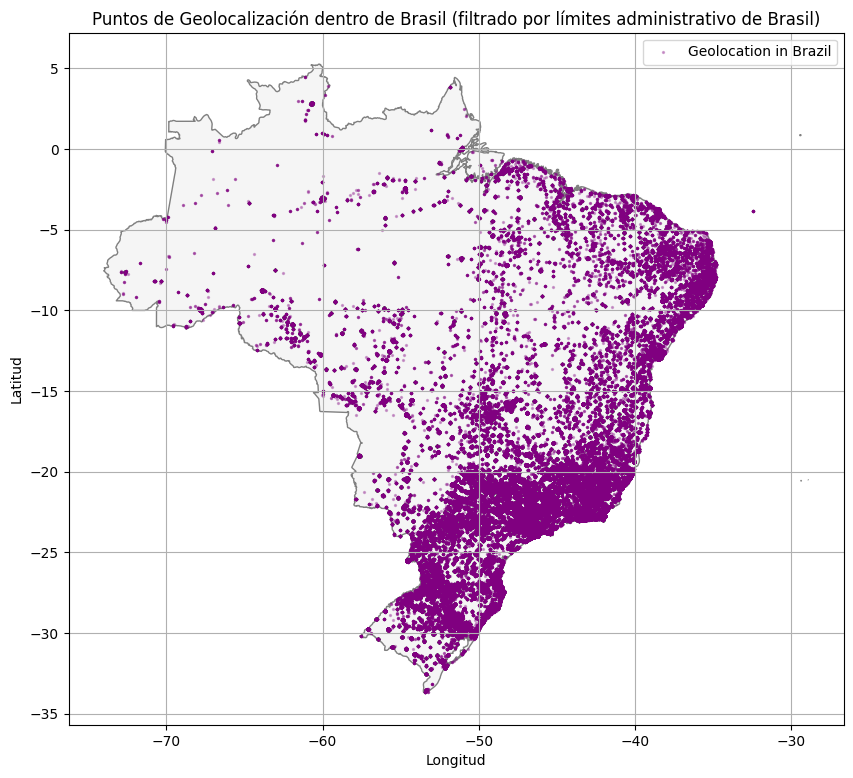

In [ ]:
# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 10))

# Dibujar el mapa de Brasil
brasil.plot(ax=ax, color='whitesmoke', edgecolor='gray')

# Dibujar los puntos filtrados dentro de Brasil
geo_df_brasil.plot(ax=ax, markersize=2, color='purple', alpha=0.3, label='Geolocation in Brazil')

plt.title('Puntos de Geolocalización dentro de Brasil (filtrado por límites administrativo de Brasil)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Agrupar por geolocation_zip_code_prefix solo con datos dentro de Brasil
geolocation_unique = geo_df_brasil.groupby('geolocation_zip_code_prefix', as_index=False).agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean'
})

# Unir con customers
customers_geo = pd.merge(
    customers,
    geolocation_unique,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
)

# Unir con sellers
sellers_geo = pd.merge(
    sellers,
    geolocation_unique,
    left_on='seller_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
)

# Mostrar resultados
print(f"Clientes totales: {len(customers)}")
print(f"Clientes con coordenadas (dentro de Brasil): {customers_geo['geolocation_lat'].notna().sum()}")

print(f"Vendedores totales: {len(sellers)}")
print(f"Vendedores con coordenadas (dentro de Brasil): {sellers_geo['geolocation_lat'].notna().sum()}")



Clientes totales: 99441
Clientes con coordenadas (dentro de Brasil): 98825
Vendedores totales: 3095
Vendedores con coordenadas (dentro de Brasil): 3084


In [ ]:
# Cuántos zip_code_prefix únicos hay en geolocation_unique
print("Zip codes en geolocation filtrado:", geolocation_unique['geolocation_zip_code_prefix'].nunique())

# Zip codes en customers sin match
missing_customers = customers[~customers['customer_zip_code_prefix'].isin(geolocation_unique['geolocation_zip_code_prefix'])]
print("Customers sin coordenadas:", len(missing_customers))

# Zip codes en sellers sin match
missing_sellers = sellers[~sellers['seller_zip_code_prefix'].isin(geolocation_unique['geolocation_zip_code_prefix'])]
print("Sellers sin coordenadas:", len(missing_sellers))


Zip codes en geolocation filtrado: 18933
Customers sin coordenadas: 616
Sellers sin coordenadas: 11


 Es una pérdida muy pequeña de datos:

Solo un 0.6% de los customers y

0.35% de los sellers quedaron sin coordenadas.

Esto pasa porque el archivo de geolocation (incluso completo) no contiene todos los códigos postales de Brasil.

In [ ]:
# Vendedores sin coordenadas (es decir, sin match en geolocation)
missing_sellers = sellers[~sellers['seller_zip_code_prefix'].isin(geolocation_unique['geolocation_zip_code_prefix'])]

# Mostrar los zip codes únicos de esos sellers
print("Zip codes de sellers sin coordenadas:")
print(missing_sellers['seller_zip_code_prefix'].unique())


Zip codes de sellers sin coordenadas:
[ 7412 72580 71551 82040 88010 37708 91901  2285 11450 29010 29056]


In [ ]:
# 1. Obtener los zip_code_prefix de sellers sin coordenadas
missing_seller_zips = missing_sellers['seller_zip_code_prefix'].unique()

# 2. Verificar cuáles de esos estaban en el geolocation original
zips_in_original = geolocation[geolocation['geolocation_zip_code_prefix'].isin(missing_seller_zips)]

# 3. Mostrar resultados
print("Zip codes de sellers sin coordenadas que sí estaban en el archivo original de geolocation:")
print(zips_in_original['geolocation_zip_code_prefix'].unique())

# También puedes ver directamente cuáles NO estaban
zips_not_in_geolocation = [zip_ for zip_ in missing_seller_zips if zip_ not in geolocation['geolocation_zip_code_prefix'].unique()]
print("Zip codes que ni siquiera estaban en el geolocation original:")
print(zips_not_in_geolocation)


Zip codes de sellers sin coordenadas que sí estaban en el archivo original de geolocation:
[11450 29010 29056 88010]
Zip codes que ni siquiera estaban en el geolocation original:
[np.int64(7412), np.int64(72580), np.int64(71551), np.int64(82040), np.int64(37708), np.int64(91901), np.int64(2285)]


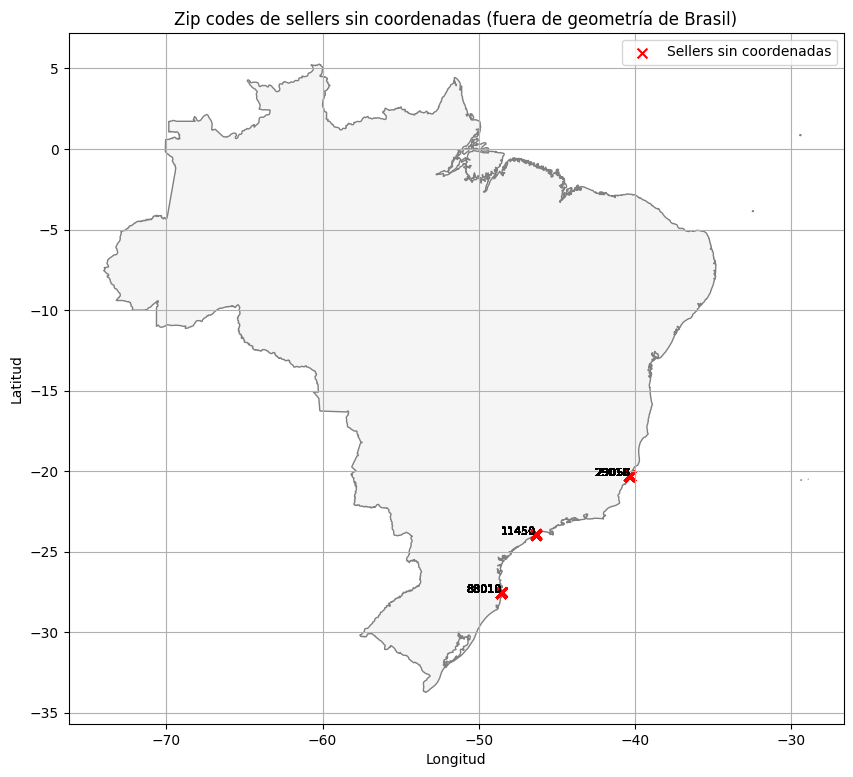

In [ ]:
# Filtrar los registros en geolocation con esos zip codes
zip_codes_to_plot = [11450, 29010, 29056, 88010]
zips_data = geolocation[geolocation['geolocation_zip_code_prefix'].isin(zip_codes_to_plot)]

import matplotlib.pyplot as plt
import geopandas as gpd

# Leer el mapa del mundo y filtrar Brasil
world = gpd.read_file('https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson')
brasil = world[world['name'] == 'Brazil']

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 10))

# Dibujar el mapa de Brasil
brasil.plot(ax=ax, color='whitesmoke', edgecolor='gray')

# Agregar los puntos de esos zip codes
plt.scatter(
    zips_data['geolocation_lng'],
    zips_data['geolocation_lat'],
    color='red', label='Sellers sin coordenadas', s=50, marker='x'
)

# Opcional: mostrar los zip codes como texto
for _, row in zips_data.iterrows():
    plt.text(row['geolocation_lng'], row['geolocation_lat'], str(row['geolocation_zip_code_prefix']),
             fontsize=8, color='black', ha='right')

plt.title('Zip codes de sellers sin coordenadas (fuera de geometría de Brasil)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.grid(True)
plt.show()


Me eliminan coordenadas que estan sobre los límites del mapa, crear un buffer sobre la geometría para no elimir estos puntos

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Convertir geolocation a GeoDataFrame
geometry = [Point(xy) for xy in zip(geolocation['geolocation_lng'], geolocation['geolocation_lat'])]
geo_df = gpd.GeoDataFrame(geolocation, geometry=geometry, crs='EPSG:4326')

# Leer geometría de Brasil
world = gpd.read_file('https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson')
brasil = world[world['name'] == 'Brazil'].to_crs(epsg=4326)

# Crear buffer (en grados, aprox 0.05° = ~5.5 km)
buffered_brasil = brasil.copy()
buffered_brasil['geometry'] = buffered_brasil.buffer(0.05)

# Filtrar puntos que están dentro del buffer
geo_df_brasil = geo_df[geo_df.within(buffered_brasil.iloc[0].geometry)]


/tmp/ipython-input-1055847805.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_brasil['geometry'] = buffered_brasil.buffer(0.05)


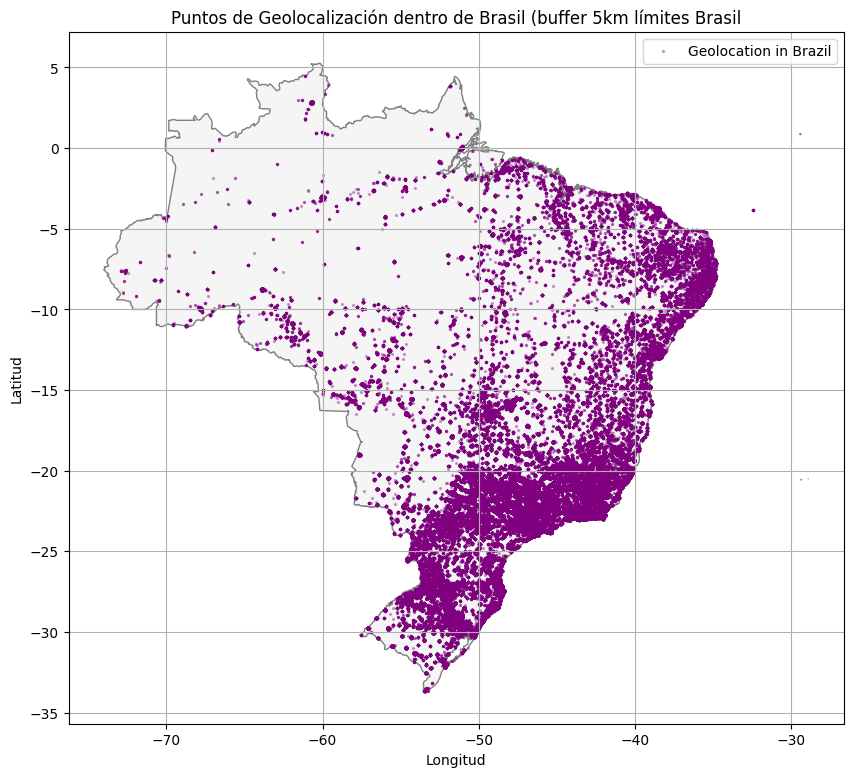

In [ ]:
# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 10))

# Dibujar el mapa de Brasil
brasil.plot(ax=ax, color='whitesmoke', edgecolor='gray')

# Dibujar los puntos filtrados dentro de Brasil
geo_df_brasil.plot(ax=ax, markersize=2, color='purple', alpha=0.3, label='Geolocation in Brazil')

plt.title('Puntos de Geolocalización dentro de Brasil (buffer 5km límites Brasil')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.grid(True)
plt.show()

### Cálculo de coordenadas promedio por ZIP (5 dígitos)

Los datos geolocalizados disponibles contienen códigos postales completos de 8 dígitos, mientras que los datos de origen (Sellers, Customer) usan solo los primeros 5 dígitos del ZIP.

In [ ]:
# Contar cuántos puntos hay por cada prefix
conteo_por_prefix = geo_df_brasil.groupby('geolocation_zip_code_prefix').size()

# Calcular el promedio de puntos por prefix
promedio = conteo_por_prefix.mean()

print(f"Promedio de puntos por geolocation_zip_code_prefix (5 digitos): {promedio:.2f}")

Promedio de puntos por geolocation_zip_code_prefix (5 digitos): 52.59


### Cálculo de coordenadas promedio por ZIP (5 dígitos)

Para resolver la diferencia entre los códigos postales de 8 dígitos del shapefile y los códigos de 5 dígitos de mis datos, se calcula un **punto promedio (centroide aproximado)** a partir de todos los códigos que **comienzan con el mismo prefijo de 5 dígitos.**

**Ejemplo: ZIP 22011 (sector Copacabana)**
- Filtrado de códigos postales

Se seleccionan todos los registros del shapefile cuyo código postal de 8 dígitos comienza con 22011.

- Cálculo del promedio
A partir de esos puntos, se calcula la **media de las coordenadas (latitud y longitud)** estimando así una **ubicación representativa única** para el código postal 22011.

<img src="https://drive.google.com/uc?id=1wCz8Bk7_rDLT02ZKO_drn8SQtjnXAHNz" width="1000">


*el procesamiento se realizó en Python (en Colab), el análisis visual se llevó a cabo en QGIS.



In [ ]:
# Agrupar por geolocation_zip_code_prefix solo con datos dentro de Brasil
geolocation_unique = geo_df_brasil.groupby('geolocation_zip_code_prefix', as_index=False).agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean'
})


In [ ]:
geolocation_unique.to_csv('olist_geolocation_dataset_filt_prefix.csv', index=False)

from google.colab import files
files.download('olist_geolocation_dataset_filt_prefix.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Unir con customers
customers_geo = pd.merge(
    customers,
    geolocation_unique,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
)

# Unir con sellers
sellers_geo = pd.merge(
    sellers,
    geolocation_unique,
    left_on='seller_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
)

# Mostrar resultados
print(f"Clientes totales: {len(customers)}")
print(f"Clientes con coordenadas (dentro de Brasil): {customers_geo['geolocation_lat'].notna().sum()}")

print(f"Vendedores totales: {len(sellers)}")
print(f"Vendedores con coordenadas (dentro de Brasil): {sellers_geo['geolocation_lat'].notna().sum()}")


Clientes totales: 99441
Clientes con coordenadas (dentro de Brasil): 99153
Vendedores totales: 3095
Vendedores con coordenadas (dentro de Brasil): 3088


<img src="https://drive.google.com/uc?id=1XKmiDP2tC328EwaQMzHgUbbAR3Wl1MJT" width="600">


La cantidad de Clientes que no tienen geolocalizacion luego de los ajuste son 0.2 % y la cantidad de Vendedores es 0.22 % de los datos totales

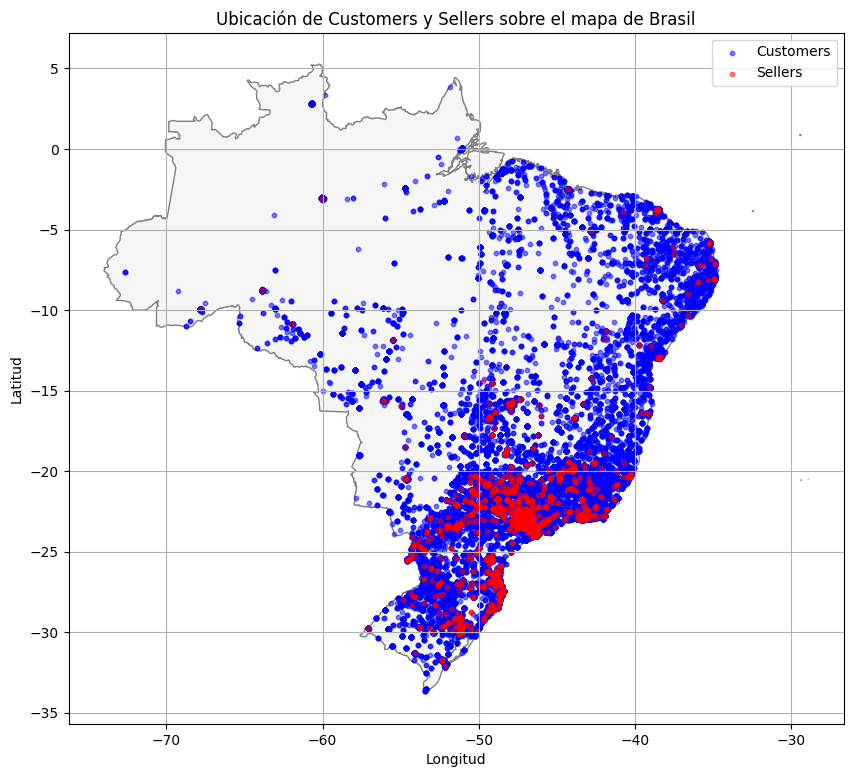

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Leer el mapa del mundo y filtrar Brasil
url = 'https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson'
world = gpd.read_file(url)
brasil = world[world['name'] == 'Brazil']

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 10))

# Dibujar el mapa de Brasil
brasil.plot(ax=ax, color='whitesmoke', edgecolor='gray')

# Agregar puntos de customers
plt.scatter(customers_geo['geolocation_lng'], customers_geo['geolocation_lat'],
            color='blue', label='Customers', alpha=0.5, s=10)

# Agregar puntos de sellers
plt.scatter(sellers_geo['geolocation_lng'], sellers_geo['geolocation_lat'],
            color='red', label='Sellers', alpha=0.5, s=10)

plt.title('Ubicación de Customers y Sellers sobre el mapa de Brasil')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
## Guardar Sellers y Customers con geolocalización

customers_geo.to_csv('olist_customers_dataset_geo.csv', index=False)
sellers_geo.to_csv('olist_sellers_dataset_geo.csv', index=False)

files.download('olist_customers_dataset_geo.csv')
files.download('olist_sellers_dataset_geo.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Customer Geo

# ID del archivo en Drive
file_id = '1zAEcK8roJweQSki3qXhfIPWZv0_RmKzy'

# Enlace de descarga directa
csv_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Leer el CSV
customer_geo = pd.read_csv(csv_url)

# Seller Geo

# ID del archivo en Drive
file_id = '1CD2w5M4g44bJJ1uCri1TnG6BM9Qtbv5f'

# Enlace de descarga directa
csv_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Leer el CSV
seller_geo = pd.read_csv(csv_url)


In [ ]:
## Identificar customer y seller sin geolocalizacion

faltan_customer = customer_geo[
    customer_geo['geolocation_lat'].isna()
]['customer_id'].unique()

print("Customer sin geolocalización")
print(len(faltan_customer), faltan_customer[:10])


faltan_seller = sellers_geo[
    seller_geo['geolocation_lat'].isna()
]['seller_id'].unique()

print()
print("Sellers sin Geolocalización")
print(len(faltan_seller), faltan_seller[:10])



Customer sin geolocalización
288 ['0e1b17d09c043febb1b71ade300fc357' '3ee60392c784c837894f3391360004a8'
 '17679c354e803265772e7ebda35857eb' 'f330cb20d9d9c5779de924d6a5fef754'
 'd198b40ba4bff0ab7ca1a37d872e9c5b' '3ff4f431d869003febc2f46b985d16e3'
 'c785736d6fb1a0a904195d7f5b709f12' 'bac2d6a45da3161ce6bcf6a09118b99e'
 'aacd2c89b47bcc2aa875ea9b1f64955d' 'f9a9e4658d1e1805f6f7fa0db82be533']

Sellers sin Geolocalización
7 ['0b3f27369a4d8df98f7eb91077e438ac' '2a50b7ee5aebecc6fd0ff9784a4747d6'
 '42bde9fef835393bb8a8849cb6b7f245' '5962468f885ea01a1b6a97a218797b0a'
 '870d0118f7a9d85960f29ad89d5d989a' '2aafae69bf4c41fbd94053d9413e87ee'
 '2e90cb1677d35cfe24eef47d441b7c87']


In [ ]:
def fill_missing_coords(df, city_col):
    # Calcular centroides por ciudad
    city_centroids = df.groupby(city_col)[["geolocation_lat", "geolocation_lng"]].mean().reset_index()

    # Hacer merge
    df = df.merge(city_centroids, on=city_col, how="left", suffixes=("", "_city_mean"))

    # Reemplazar NaN
    df["geolocation_lat"] = df["geolocation_lat"].fillna(df["geolocation_lat_city_mean"])
    df["geolocation_lng"] = df["geolocation_lng"].fillna(df["geolocation_lng_city_mean"])

    # Eliminar columnas temporales
    df = df.drop(columns=["geolocation_lat_city_mean", "geolocation_lng_city_mean"])

    return df

customer_geo = fill_missing_coords(customer_geo, "customer_city")
seller_geo   = fill_missing_coords(seller_geo, "seller_city")



In [ ]:
## Verifiamos la mejora en los datos de geolocalizacion

# Clientes sin ubicación
missing_customers = customer_geo[customer_geo[["geolocation_lat", "geolocation_lng"]].isna().any(axis=1)]
num_missing_customers = len(missing_customers)
pct_missing_customers = (num_missing_customers / len(customer_geo)) * 100

print(f"Clientes sin ubicación: {num_missing_customers} ({pct_missing_customers:.2f}%)")

# Vendedores sin ubicación
missing_sellers = seller_geo[seller_geo[["geolocation_lat", "geolocation_lng"]].isna().any(axis=1)]
num_missing_sellers = len(missing_sellers)
pct_missing_sellers = (num_missing_sellers / len(seller_geo)) * 100

print(f"Vendedores sin ubicación: {num_missing_sellers} ({pct_missing_sellers:.2f}%)")


Clientes sin ubicación: 53 (0.05%)
Vendedores sin ubicación: 0 (0.00%)


### Manejo de valores faltantes en geolocalización

- **Clientes sin ubicación:** 53 registros (≈0.05% del total)  
- **Vendedores sin ubicación:** 0 registros (0.00%)  

#### Decisión metodológica:
1. Los valores faltantes en coordenadas son muy pocos y representan una fracción mínima del dataset.  
2. Se imputaron coordenadas faltantes usando el **promedio de la ciudad**, lo cual es razonable porque mantiene la referencia espacial local.  
3. No se continuará imputando a nivel de **estado**, ya que:
   - Los estados en Brasil son muy extensos.
   - Imputar a nivel estatal introduciría un **sesgo mayor** que el beneficio de retener esos pocos registros.  

#### Conclusión:
- Los 53 clientes sin ubicación se mantendrán como `NaN`.  
- Estos casos podrán ser **excluidos solo de los análisis que requieran coordenadas** (mapas, distancias, clustering geográfico).  
- Para el resto de los análisis, su ausencia no afecta los resultados globales.

In [ ]:
## Guardar Customers con geolocalización imputados

customer_geo.to_csv('olist_customer_dataset_geo.csv', index=False, encoding='utf-8')

files.download('olist_customer_dataset_geo.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
## Guardar Sellers con geolocalización imputados

seller_geo.to_csv('olist_seller_dataset_geo.csv', index=False, encoding='utf-8')
files.download('olist_seller_dataset_geo.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

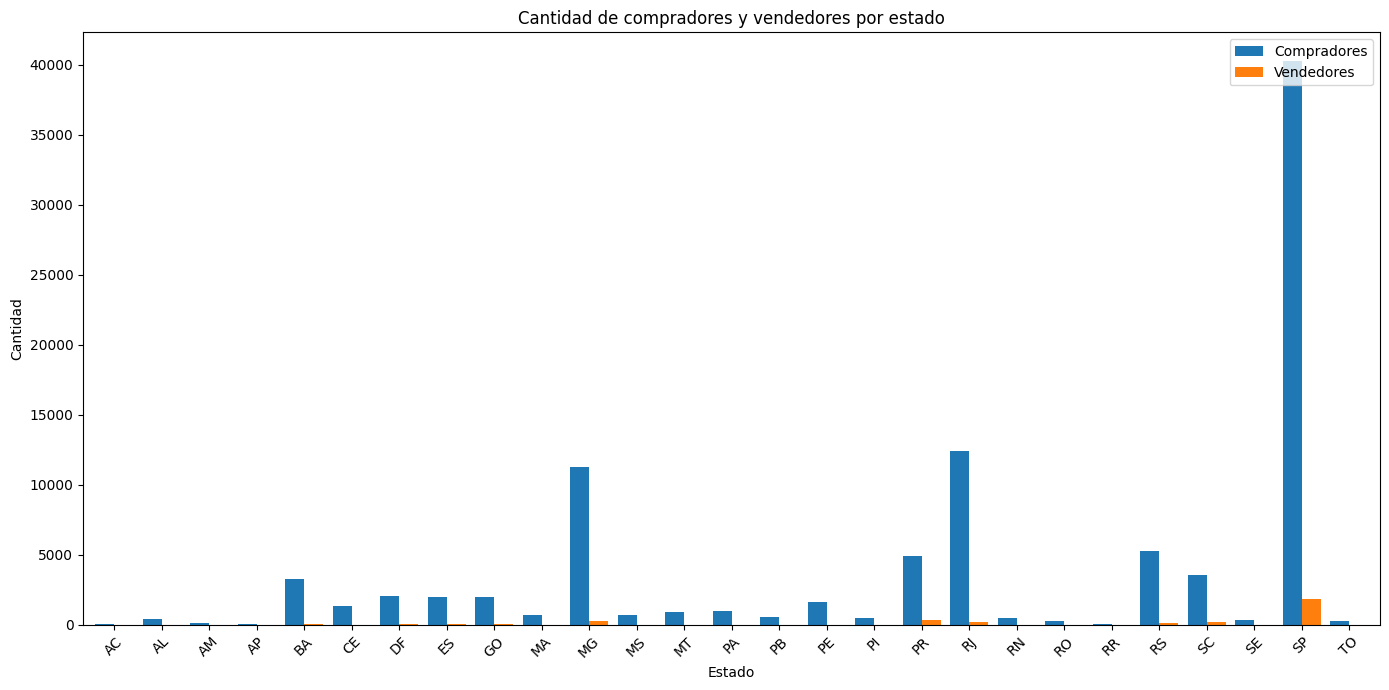

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar y contar
compradores_por_estado = customers.groupby('customer_state')['customer_unique_id'].nunique()
vendedores_por_estado = sellers.groupby('seller_state')['seller_id'].nunique()

# Crear DataFrame comparativo
df_comparacion = pd.DataFrame({
    'Compradores': compradores_por_estado,
    'Vendedores': vendedores_por_estado
}).fillna(0)

# Graficar directamente sin normalizar
ax = df_comparacion.plot(kind='bar', figsize=(14, 7), width=0.8)
plt.title('Cantidad de compradores y vendedores por estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


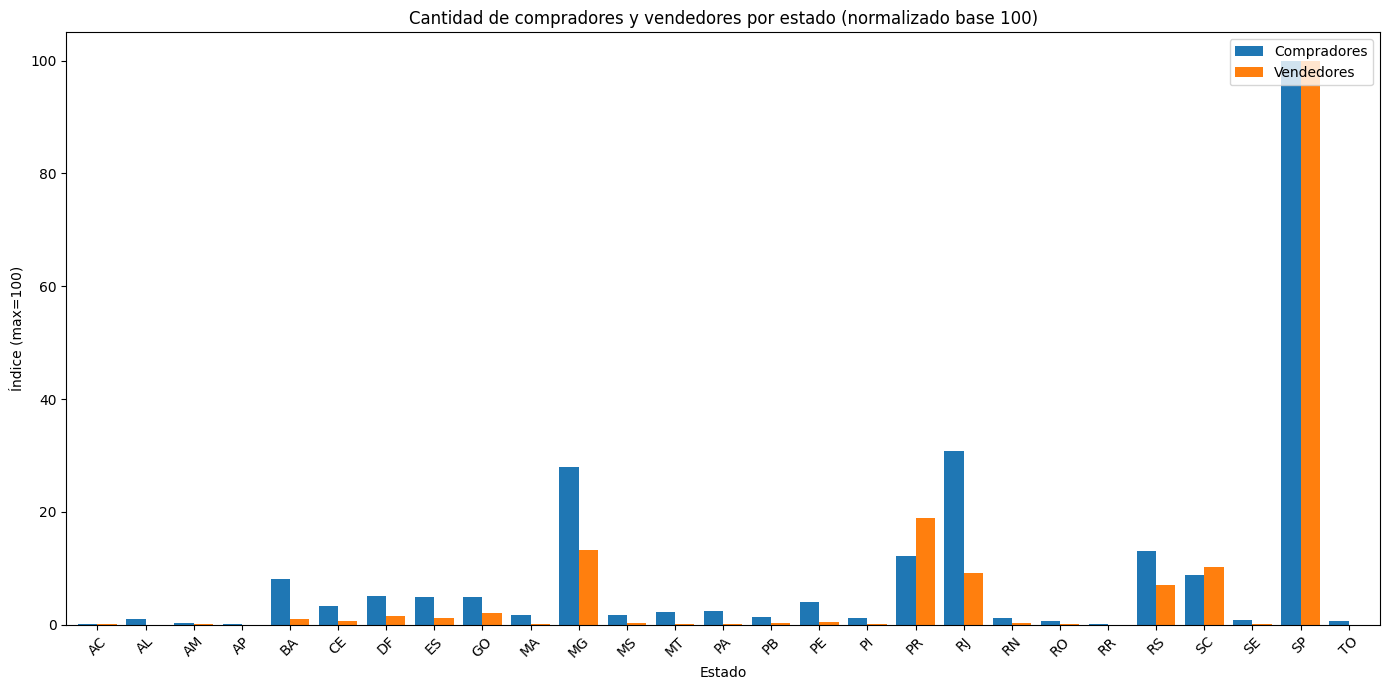

In [ ]:
import matplotlib.pyplot as plt

compradores_por_estado = customers.groupby('customer_state')['customer_unique_id'].nunique()
vendedores_por_estado = sellers.groupby('seller_state')['seller_id'].nunique()

df_comparacion = pd.DataFrame({
    'Compradores': compradores_por_estado,
    'Vendedores': vendedores_por_estado
}).fillna(0)

df_comparacion_norm = df_comparacion.copy()

df_comparacion_norm['Compradores'] = (df_comparacion['Compradores'] / df_comparacion['Compradores'].max()) * 100
df_comparacion_norm['Vendedores'] = (df_comparacion['Vendedores'] / df_comparacion['Vendedores'].max()) * 100


ax = df_comparacion_norm.plot(kind='bar', figsize=(14,7), width=0.8)
plt.title('Cantidad de compradores y vendedores por estado (normalizado base 100)')
plt.xlabel('Estado')
plt.ylabel('Índice (max=100)')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [ ]:
# Ejemplo con las tablas ya cargadas: order_items, order_reviews, orders, sellers

# Agregados por seller
seller_sales = order_items.groupby("seller_id").agg(
    total_sales=("price", "sum"),
    n_orders=("order_id", "count"),
    avg_price=("price", "mean"),
    avg_freight=("freight_value", "mean")
).reset_index()

# Reviews promedio por seller
reviews = order_reviews[["order_id","review_score"]]
reviews = order_items.merge(reviews, on="order_id", how="left")
seller_reviews = reviews.groupby("seller_id")["review_score"].mean().reset_index()
seller_reviews.rename(columns={"review_score":"avg_review_score"}, inplace=True)

# Merge final
df_sellers = (
    seller_sales
    .merge(seller_reviews, on="seller_id", how="left")
    .merge(sellers, on="seller_id", how="left")
)

df_sellers.head()


,seller_id,total_sales,n_orders,avg_price,avg_freight,avg_review_score,seller_zip_code_prefix,seller_city,seller_state
0,0015a82c2db000af6aaaf3ae2ecb0532,2685.00,3,895.000000,21.020000,3.666667,9080,santo andre,SP
1,001cca7ae9ae17fb1caed9dfb1094831,25080.03,239,104.937364,37.046611,3.902542,29156,cariacica,ES
2,001e6ad469a905060d959994f1b41e4f,250.00,1,250.000000,17.940000,1.000000,24754,sao goncalo,RJ
3,002100f778ceb8431b7a1020ff7ab48f,1234.50,55,22.445455,14.430182,3.982143,14405,franca,SP
4,003554e2dce176b5555353e4f3555ac8,120.00,1,120.000000,19.380000,5.000000,74565,goiania,GO


2. 🧹 Limpieza y normalización

In [ ]:
from sklearn.preprocessing import StandardScaler

# Variables predictoras y target
features = ["n_orders", "avg_price", "avg_freight", "avg_review_score"]
target = "total_sales"

df_model = df_sellers[features + [target]].copy()

# 1. Imputación de nulos
df_model = df_model.fillna(df_model.mean())

# 2. Función para remover outliers con IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

for col in features:
    df_model = remove_outliers_iqr(df_model, col)

# 3. Escalado Z-score
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_model[features])
X = pd.DataFrame(X_scaled, columns=features, index=df_model.index)
y = df_model[target]

print("Shape X:", X.shape, "Shape y:", y.shape)


Shape X: (2049, 4) Shape y: (2049,)


## B.4 PRODUCTS

In [ ]:
# Información general
print(products.info())

# Estadísticas descriptivas de las columnas numéricas
print(products.describe())

# Revisar valores nulos por columna
print(products.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None
       product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.4952

1. Identificación de productos con peso 0

* Filtramos los productos con product_weight_g = 0.

* Se encontraron 4 productos con peso 0.

* Decidimos asignar NaN a estos pesos, ya que no representan un valor válido.

In [ ]:
## Existen valores como cero en el peso

# ----------------------------
# 1. Verificar productos con peso 0
# ----------------------------
productos_peso_cero = products[products['product_weight_g'] == 0]
print(f"Número de productos con peso 0: {len(productos_peso_cero)}")
print(productos_peso_cero[['product_id', 'product_category_name', 'product_weight_g']])

# ----------------------------
# 2. Verificar productos con peso ya nulo
# ----------------------------
productos_peso_na = products[products['product_weight_g'].isna()]
print(f"Número de productos con peso nulo original: {len(productos_peso_na)}")
print(productos_peso_na[['product_id', 'product_category_name', 'product_weight_g']])

# ----------------------------
# 3. Asignar NaN solo a productos con peso 0
# ----------------------------
products.loc[products['product_weight_g'] == 0, 'product_weight_g'] = np.nan

# ----------------------------
# 4. Verificar total de productos con peso NaN después del reemplazo
# ----------------------------
total_na = products['product_weight_g'].isna().sum()
print(f"Total de productos con peso NaN ahora: {total_na}")

Número de productos con peso 0: 4
                             product_id product_category_name  \
9769   81781c0fed9fe1ad6e8c81fca1e1cb08       cama_mesa_banho   
13683  8038040ee2a71048d4bdbbdc985b69ab       cama_mesa_banho   
14997  36ba42dd187055e1fbe943b2d11430ca       cama_mesa_banho   
32079  e673e90efa65a5409ff4196c038bb5af       cama_mesa_banho   

       product_weight_g  
9769                0.0  
13683               0.0  
14997               0.0  
32079               0.0  
Número de productos con peso nulo original: 2
                             product_id product_category_name  \
8578   09ff539a621711667c43eba6a3bd8466                 bebes   
18851  5eb564652db742ff8f28759cd8d2652a                   NaN   

       product_weight_g  
8578                NaN  
18851               NaN  
Total de productos con peso NaN ahora: 6


2. Cálculo del volumen

* Creamos la columna product_volume_cm3 como:

### volumen = length × width × height

* Productos con dimensiones faltantes se dejan con volumen NaN.

* Resultado: ningún producto con volumen igual a 0.

In [ ]:
# ----------------------------
# 1. Verificar que las dimensiones no tengan valores nulos
# ----------------------------
print(products[['product_length_cm', 'product_width_cm', 'product_height_cm']].isna().sum())

# ----------------------------
# 2. Calcular volumen en cm³
# ----------------------------
products['product_volume_cm3'] = (
    products['product_length_cm'] *
    products['product_width_cm'] *
    products['product_height_cm']
)

# ----------------------------
# 3. Revisar los valores
# ----------------------------
print(products[['product_id', 'product_length_cm', 'product_width_cm', 'product_height_cm', 'product_volume_cm3']].head())

# ----------------------------
# 4. Identificar productos con volumen cero o nulo (para imputar o revisar)
# ----------------------------
productos_volumen_cero = products[products['product_volume_cm3'] == 0]
print(f"Productos con volumen cero: {len(productos_volumen_cero)}")
print(productos_volumen_cero[['product_id', 'product_length_cm', 'product_width_cm', 'product_height_cm', 'product_volume_cm3']])


product_length_cm    2
product_width_cm     2
product_height_cm    2
dtype: int64
                         product_id  product_length_cm  product_width_cm  \
0  1e9e8ef04dbcff4541ed26657ea517e5               16.0              14.0   
1  3aa071139cb16b67ca9e5dea641aaa2f               30.0              20.0   
2  96bd76ec8810374ed1b65e291975717f               18.0              15.0   
3  cef67bcfe19066a932b7673e239eb23d               26.0              26.0   
4  9dc1a7de274444849c219cff195d0b71               20.0              13.0   

   product_height_cm  product_volume_cm3  
0               10.0              2240.0  
1               18.0             10800.0  
2                9.0              2430.0  
3                4.0              2704.0  
4               17.0              4420.0  
Productos con volumen cero: 0
Empty DataFrame
Columns: [product_id, product_length_cm, product_width_cm, product_height_cm, product_volume_cm3]
Index: []


3. Cálculo de densidad

* Creamos la columna product_density_g_cm3 como:

densidad = peso (g) / volumen (cm³)

* Productos con peso o volumen NaN tendrán densidad NaN.

* Resultado: 6 productos con densidad NaN, correspondientes a:

  * Productos con peso 0 previamente asignado a NaN (4 productos).

  * Productos con dimensiones faltantes (2 productos).

In [ ]:
# ----------------------------
# 1. Calcular densidad en g/cm³
# ----------------------------
products['product_density_g_cm3'] = products['product_weight_g'] / products['product_volume_cm3']

# ----------------------------
# 2. Revisar los valores
# ----------------------------
print(products[['product_id', 'product_weight_g', 'product_volume_cm3', 'product_density_g_cm3']].head())

# ----------------------------
# 3. Revisar productos con densidad nula (peso o volumen faltante)
# ----------------------------
productos_densidad_nula = products[products['product_density_g_cm3'].isna()]
print(f"Productos con densidad nula: {len(productos_densidad_nula)}")
print(productos_densidad_nula[['product_id', 'product_weight_g', 'product_volume_cm3', 'product_density_g_cm3']])


                         product_id  product_weight_g  product_volume_cm3  \
0  1e9e8ef04dbcff4541ed26657ea517e5             225.0              2240.0   
1  3aa071139cb16b67ca9e5dea641aaa2f            1000.0             10800.0   
2  96bd76ec8810374ed1b65e291975717f             154.0              2430.0   
3  cef67bcfe19066a932b7673e239eb23d             371.0              2704.0   
4  9dc1a7de274444849c219cff195d0b71             625.0              4420.0   

   product_density_g_cm3  
0               0.100446  
1               0.092593  
2               0.063374  
3               0.137204  
4               0.141403  
Productos con densidad nula: 6
                             product_id  product_weight_g  product_volume_cm3  \
8578   09ff539a621711667c43eba6a3bd8466               NaN                 NaN   
9769   81781c0fed9fe1ad6e8c81fca1e1cb08               NaN             22500.0   
13683  8038040ee2a71048d4bdbbdc985b69ab               NaN             22500.0   
14997  36ba42dd18705

4. Observaciones

* La cantidad de productos con información incompleta es muy baja (~0.02% del dataset total).

* Para análisis logísticos o predicción de costos de envío, se puede dejar como NaN

In [ ]:
print(products.head(2))

                         product_id product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5            perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                 artes   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0              14.0   
1            1000.0               30.0               18.0              20.0   

   product_volume_cm3  product_density_g_cm3  
0              2240.0               0.100446  
1             10800.0               0.092593  


In [ ]:
# Reemplazar valores nulos en la columna de longitud de descripción por 0
products['product_description_lenght'] = products['product_description_lenght'].fillna(0)

# O, si tienes la descripción textual en otra columna, puedes crear la longitud en caracteres
# products['desc_char_count'] = products['product_description'].fillna('').apply(len)

# Verificar cambios
print(products[['product_id', 'product_description_lenght']].head())


                         product_id  product_description_lenght
0  1e9e8ef04dbcff4541ed26657ea517e5                       287.0
1  3aa071139cb16b67ca9e5dea641aaa2f                       276.0
2  96bd76ec8810374ed1b65e291975717f                       250.0
3  cef67bcfe19066a932b7673e239eb23d                       261.0
4  9dc1a7de274444849c219cff195d0b71                       402.0


In [ ]:
# Mostrar todos los valores únicos de la categoría de producto
categorias_unicas = products['product_category_name'].unique()
print(categorias_unicas)

['perfumaria' 'artes' 'esporte_lazer' 'bebes' 'utilidades_domesticas'
 'instrumentos_musicais' 'cool_stuff' 'moveis_decoracao'
 'eletrodomesticos' 'brinquedos' 'cama_mesa_banho'
 'construcao_ferramentas_seguranca' 'informatica_acessorios'
 'beleza_saude' 'malas_acessorios' 'ferramentas_jardim'
 'moveis_escritorio' 'automotivo' 'eletronicos' 'fashion_calcados'
 'telefonia' 'papelaria' 'fashion_bolsas_e_acessorios' 'pcs'
 'casa_construcao' 'relogios_presentes'
 'construcao_ferramentas_construcao' 'pet_shop' 'eletroportateis'
 'agro_industria_e_comercio' nan 'moveis_sala' 'sinalizacao_e_seguranca'
 'climatizacao' 'consoles_games' 'livros_interesse_geral'
 'construcao_ferramentas_ferramentas' 'fashion_underwear_e_moda_praia'
 'fashion_roupa_masculina'
 'moveis_cozinha_area_de_servico_jantar_e_jardim'
 'industria_comercio_e_negocios' 'telefonia_fixa'
 'construcao_ferramentas_iluminacao' 'livros_tecnicos'
 'eletrodomesticos_2' 'artigos_de_festas' 'bebidas' 'market_place'
 'la_cuisine' 'const

In [ ]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 5.3 MB/s eta 0:00:00


In [ ]:
from unidecode import unidecode
import pandas as pd

# Supongamos que tu DataFrame se llama products

# Diccionario completo de traducción y normalización
categoria_map = {
    'perfumaria': 'perfumeria',
    'artes': 'artes',
    'esporte_lazer': 'deportes_y_ocio',
    'bebes': 'bebes',
    'utilidades_domesticas': 'utilidades_domesticas',
    'instrumentos_musicais': 'instrumentos_musicales',
    'cool_stuff': 'articulos_curiosos',
    'moveis_decoracao': 'muebles_y_decoracion',
    'eletrodomesticos': 'electrodomesticos',
    'brinquedos': 'juguetes',
    'cama_mesa_banho': 'ropa_de_cama_mesa_y_banho',
    'construcao_ferramentas_seguranca': 'construccion_herramientas_seguridad',
    'informatica_acessorios': 'informatica_accesorios',
    'beleza_saude': 'belleza_y_salud',
    'malas_acessorios': 'maletas_y_accesorios',
    'ferramentas_jardim': 'herramientas_jardin',
    'moveis_escritorio': 'muebles_de_oficina',
    'automotivo': 'automotriz',
    'eletronicos': 'electronica',
    'fashion_calcados': 'moda_calzado',
    'telefonia': 'telefonia',
    'papelaria': 'papeleria',
    'fashion_bolsas_e_acessorios': 'moda_bolsos_y_accesorios',
    'pcs': 'pcs',
    'casa_construcao': 'hogar_y_construccion',
    'relogios_presentes': 'relojes_y_regalos',
    'construcao_ferramentas_construcao': 'construccion_herramientas_construccion',
    'pet_shop': 'tienda_mascotas',
    'eletroportateis': 'electroportatiles',
    'agro_industria_e_comercio': 'agro_industria_y_comercio',
    'moveis_sala': 'muebles_sala',
    'sinalizacao_e_seguranca': 'senalizacion_y_seguridad',
    'climatizacao': 'climatizacion',
    'consoles_games': 'consolas_y_videojuegos',
    'livros_interesse_geral': 'libros_interes_general',
    'construcao_ferramentas_ferramentas': 'construccion_herramientas_varias',
    'fashion_underwear_e_moda_praia': 'moda_interior_y_playa',
    'fashion_roupa_masculina': 'moda_ropa_masculina',
    'moveis_cozinha_area_de_servico_jantar_e_jardim': 'muebles_cocina_y_jardin',
    'industria_comercio_e_negocios': 'industria_comercio_y_negocios',
    'telefonia_fixa': 'telefonia_fija',
    'construcao_ferramentas_iluminacao': 'construccion_herramientas_iluminacion',
    'livros_tecnicos': 'libros_tecnicos',
    'eletrodomesticos_2': 'electrodomesticos',
    'artigos_de_festas': 'articulos_de_fiestas',
    'bebidas': 'bebidas',
    'market_place': 'marketplace',
    'la_cuisine': 'cocina',
    'construcao_ferramentas_jardim': 'construccion_herramientas_jardin',
    'fashion_roupa_feminina': 'moda_ropa_femenina',
    'casa_conforto': 'hogar_y_confort',
    'audio': 'audio',
    'alimentos_bebidas': 'alimentos_y_bebidas',
    'musica': 'musica',
    'alimentos': 'alimentos',
    'tablets_impressao_imagem': 'tablets_impresion_y_imagen',
    'livros_importados': 'libros_importados',
    'portateis_casa_forno_e_cafe': 'portatiles_hogar_horno_y_cafe',
    'fashion_esporte': 'moda_deportes',
    'artigos_de_natal': 'articulos_navidad',
    'fashion_roupa_infanto_juvenil': 'moda_infantil_y_juvenil',
    'dvds_blu_ray': 'dvds_y_bluray',
    'artes_e_artesanato': 'artes_y_artesanias',
    'pc_gamer': 'pc_gamer',
    'moveis_quarto': 'muebles_dormitorio',
    'cine_foto': 'cine_y_foto',
    'fraldas_higiene': 'pañales_y_higiene',
    'flores': 'flores',
    'casa_conforto_2': 'hogar_y_confort_2',
    'portateis_cozinha_e_preparadores_de_alimentos': 'portatiles_cocina_y_preparadores',
    'seguros_e_servicos': 'seguros_y_servicios',
    'moveis_colchao_e_estofado': 'muebles_colchon_y_estofado',
    'cds_dvds_musicais': 'cds_y_dvds_musicales',
    # En caso de valores nulos, se reemplazará más abajo
}

# Reemplazar categorías
products['product_category_name'] = products['product_category_name'].replace(categoria_map)

# Normalizar: minúsculas, quitar tildes y reemplazar espacios por "_", valores nulos a 'desconocido'
products['product_category_name'] = products['product_category_name'].apply(
    lambda x: unidecode(str(x)).lower().replace(' ', '_') if pd.notnull(x) else 'desconocido'
)

# Verificar
print(products['product_category_name'].unique())

['perfumeria' 'artes' 'deportes_y_ocio' 'bebes' 'utilidades_domesticas'
 'instrumentos_musicales' 'articulos_curiosos' 'muebles_y_decoracion'
 'electrodomesticos' 'juguetes' 'ropa_de_cama_mesa_y_banho'
 'construccion_herramientas_seguridad' 'informatica_accesorios'
 'belleza_y_salud' 'maletas_y_accesorios' 'herramientas_jardin'
 'muebles_de_oficina' 'automotriz' 'electronica' 'moda_calzado'
 'telefonia' 'papeleria' 'moda_bolsos_y_accesorios' 'pcs'
 'hogar_y_construccion' 'relojes_y_regalos'
 'construccion_herramientas_construccion' 'tienda_mascotas'
 'electroportatiles' 'agro_industria_y_comercio' 'desconocido'
 'muebles_sala' 'senalizacion_y_seguridad' 'climatizacion'
 'consolas_y_videojuegos' 'libros_interes_general'
 'construccion_herramientas_varias' 'moda_interior_y_playa'
 'moda_ropa_masculina' 'muebles_cocina_y_jardin'
 'industria_comercio_y_negocios' 'telefonia_fija'
 'construccion_herramientas_iluminacion' 'libros_tecnicos'
 'articulos_de_fiestas' 'bebidas' 'marketplace' 'coci

In [ ]:
## Guardar el archivo
from google.colab import files


products.to_csv('olist_products_dataset_filt.csv', index=False)

files.download("olist_products_dataset_filt.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## B.5 Order_items

In [ ]:
import pandas as pd

# Número de vendedores distintos por orden
sellers_per_order = order_items.groupby("order_id")["seller_id"].nunique()

# Cuántas órdenes tienen 1 vendedor, 2 vendedores, etc.
sellers_distribution = sellers_per_order.value_counts().sort_index()

print("Distribución de cantidad de vendedores por orden:")
print(sellers_distribution)






Distribución de cantidad de vendedores por orden:
seller_id
1    97388
2     1219
3       54
4        3
5        2
Name: count, dtype: int64


La gran mayoría (más del 98%) de las órdenes tienen un solo seller, pero existe un pequeño porcentaje con múltiples sellers. Eso significa que el marketplace permite que una misma orden agrupe productos de diferentes vendedores.

Calcular la distancia entre seller y customer, se complica un poco cuando una orden tiene más de un seller, porque ya no es un único origen–destino.

Estrategias posibles (dependiendo del tipo de análisis que quieras hacer):

🔹 1. Calcular a nivel de ítem (order_item_id)

Cada fila de order_items ya identifica un order_item_id, que corresponde a un producto de un seller específico dentro de una orden.

Calcular la distancia por cada ítem, usando seller → customer como par único.

Después resumir esas distancias por orden (ej. promedio, máximo, mínimo).

✅ Ventaja: no perder información.
⚠️ Desventaja: si una orden tiene 3 sellers, vas a tener 3 distancias distintas.

🔹 2. Definir una distancia representativa por orden

Si te interesa quedarte con una sola distancia por order_id, opciones:

Promedio de distancias entre los sellers y el customer.

Distancia mínima (el seller más cercano al cliente).

Distancia máxima (el más lejano).

Ponderado por el precio del ítem (ej. un ítem caro pesa más que uno barato en la distancia promedio).

🔹 3. Separar el análisis

Hacer dos tablas distintas:

Una con órdenes de un solo seller (donde la distancia es directa y única).

Otra con órdenes multi-seller, donde aclarás que se usó el promedio/ponderado/mínimo/etc.

### B5.1 Calcular distancia por Item


In [ ]:
# Unir order_items con orders para traer customer_id
order_items_customers = order_items.merge(
    orders[['order_id', 'customer_id']],
    on='order_id',
    how='left'
)

# Unir con geolocalización de customers
order_items_customers = order_items_customers.merge(
    customer_geo[['customer_id', 'customer_zip_code_prefix', 'customer_state', 'geolocation_lat', 'geolocation_lng']],
    on='customer_id',
    how='left'
)

# Unir con geolocalización de sellers
order_items_customers = order_items_customers.merge(
    seller_geo[['seller_id', 'seller_zip_code_prefix', 'seller_state', 'geolocation_lat', 'geolocation_lng']],
    on='seller_id',
    how='left',
    suffixes=('_customer', '_seller')
)


In [ ]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    # convertir a radianes
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    # diferencias
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    # fórmula haversine
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c  # radio de la Tierra en km
    return km


In [ ]:
order_items_customers['distance_km'] = haversine(
    order_items_customers['geolocation_lat_customer'],
    order_items_customers['geolocation_lng_customer'],
    order_items_customers['geolocation_lat_seller'],
    order_items_customers['geolocation_lng_seller']
)

print(order_items_customers.columns)

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'customer_zip_code_prefix', 'customer_state',
       'geolocation_lat_customer', 'geolocation_lng_customer',
       'seller_zip_code_prefix', 'seller_state', 'geolocation_lat_seller',
       'geolocation_lng_seller', 'distance_km'],
      dtype='object')


In [ ]:
from google.colab import files


# Guardar el dataset con distancias por ítem
order_items_customers.to_csv('olist_order_items_dataset_distance.csv', index=False, encoding='utf-8')

files.download('olist_order_items_dataset_distance.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

count    112598.000000
mean        597.206034
std         588.370331
min           0.000000
25%         185.834926
50%         432.723590
75%         794.435476
max        3579.894251
Name: distance_km, dtype: float64


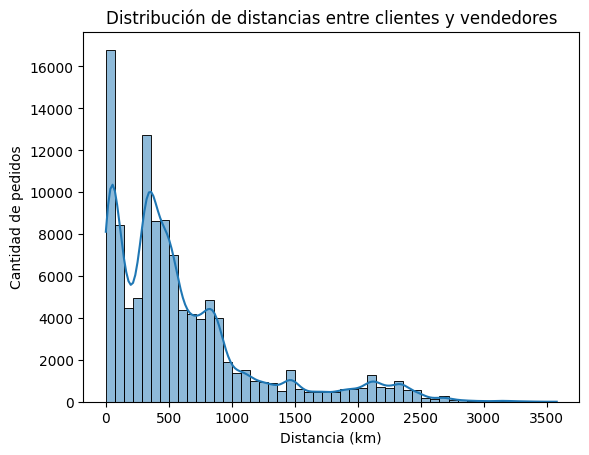

In [ ]:
print(order_items_customers['distance_km'].describe())

import seaborn as sns
import matplotlib.pyplot as plt

## Distribución de distancia entre clientes y vendedores

sns.histplot(order_items_customers['distance_km'], bins=50, kde=True)
plt.xlabel('Distancia (km)')
plt.ylabel('Cantidad de pedidos')
plt.title('Distribución de distancias entre clientes y vendedores')
plt.show()


In [ ]:
#Distancia promedio por estado
avg_distance_state = order_items_customers.groupby('customer_state')['distance_km'].mean().sort_values(ascending=False)
print(avg_distance_state)


customer_state
RR    3249.058207
AM    2646.105627
AC    2638.318973
AP    2592.197633
PA    2280.172517
RO    2225.445439
CE    2191.672832
MA    2106.575812
RN    2097.831947
PB    2094.748984
PE    1975.556214
PI    1962.835284
AL    1835.078992
SE    1648.078057
TO    1483.533228
MT    1351.184207
BA    1343.720767
RS     867.991436
MS     846.889401
DF     829.342685
ES     799.503692
GO     774.180955
SC     573.137022
MG     533.148115
RJ     487.017633
PR     485.814983
SP     247.244539
Name: distance_km, dtype: float64


## B.6 Orders

**Información**

* `order_purchase_timestamp` → momento en que se hace la compra 🛒
* `order_approved_at` → cuando se aprueba el pago 💳
* `order_delivered_carrier_date` → cuando se entrega al transportista 🚚
* `order_delivered_customer_date` → cuando llega al cliente 🏠
* `order_estimated_delivery_date` → fecha estimada de entrega 📅

**Calculos realizados**

**time_to_approval (horas)**  
-Analizar eficiencia del procesamiento de pagos.
-Detectar pedidos con aprobación lenta.

Tiempo desde la compra hasta la aprobación de la orden.  
- **Cálculo:** `(order_approved_at - order_purchase_timestamp).total_seconds() / 3600`  
- **Media:** ~9.65 h  
- **Mediana:** ~0.34 h  
- **75% de las órdenes:** se aprueban en menos de 13.5 h  
- **Valores máximos:** pueden representar pedidos especiales o retrasos administrativos (~741 h)

**time_to_carrier (horas)**  
-Evaluar tiempos de preparación y despacho por parte del vendedor.

Tiempo desde la aprobación hasta la entrega al transportista.  
- **Cálculo:** `(order_delivered_carrier_date - order_approved_at).total_seconds() / 3600`  
- **Media:** ~68.5 h  
- **Mediana:** ~44.4 h  
- **75% de las órdenes:** se entregan al carrier en menos de 87 h

**time_to_delivery (horas)**  
-Estudiar el lead time completo de la operación.  
-Comparar velocidad real de entrega entre vendedores.


Tiempo total desde la compra hasta que el cliente recibe el pedido.  
- **Cálculo:** `(order_delivered_customer_date - order_purchase_timestamp).total_seconds() / 3600`  
- **Media:** ~303 h (\~12.6 días)  
- **Mediana:** ~246 h (\~10.25 días)

**delivery_delay (horas)**  
-Medir cumplimiento de plazos de entrega.  
-Detectar patrones de retraso o entrega anticipada.

- **Cálculo:** `(order_delivered_customer_date - order_estimated_delivery_date).total_seconds() / 3600`  
- **Media:** ~-267 h (\~-11 días), indica que la mayoría de los pedidos llegan antes de la fecha estimada  
- **Min/Max:** valores extremos pueden reflejar errores de registro o retrasos atípicos

### Observaciones
- La mediana de `time_to_approval` es muy baja, lo que indica que la mayoría de las órdenes se aprueban rápidamente.  
- Hay un sesgo en `delivery_delay` hacia valores negativos, sugiriendo que las estimaciones de entrega son conservadoras.  
- Existen algunos valores extremos (outliers) que podrían ser errores o casos excepcionales.

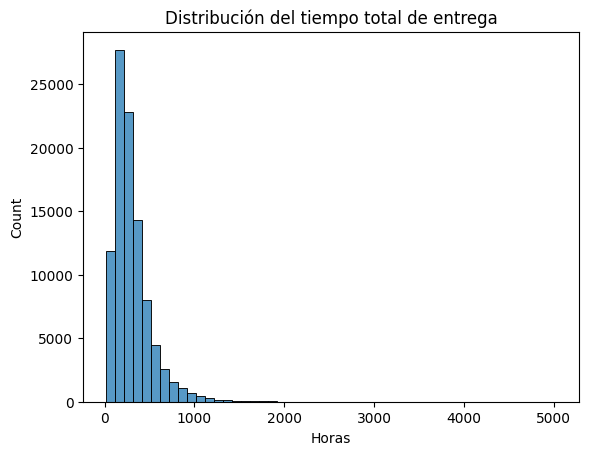

In [ ]:
date_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
orders[date_cols] = orders[date_cols].apply(pd.to_datetime)


orders['time_to_approval'] = (
    orders['order_approved_at'] - orders['order_purchase_timestamp']
).dt.total_seconds() / 3600

orders['time_to_carrier'] = (
    orders['order_delivered_carrier_date'] - orders['order_approved_at']
).dt.total_seconds() / 3600

orders['time_to_delivery'] = (
    orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']
).dt.total_seconds() / 3600

orders['delivery_delay'] = (
    orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']
).dt.total_seconds() / 3600


orders[['time_to_approval','time_to_carrier','time_to_delivery','delivery_delay']].describe()

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(orders['time_to_delivery'], bins=50)
plt.title("Distribución del tiempo total de entrega")
plt.xlabel("Horas")
plt.show()



In [ ]:
orders[['time_to_approval','time_to_carrier','time_to_delivery','delivery_delay']].describe()


,time_to_approval,time_to_carrier,time_to_delivery,delivery_delay
count,99281.000000,97644.000000,96476.000000,96476.000000
mean,10.419094,67.320916,301.408855,-268.298877
std,26.038004,85.186249,229.116717,244.466717
min,0.000000,-4109.256111,12.801944,-3504.386944
25%,0.215000,21.012222,162.393681,-389.865208
50%,0.343333,43.641528,245.226111,-286.774583
75%,14.580833,85.931250,377.287847,-153.360000
max,4509.180556,3018.301667,5031.086667,4535.401944


In [ ]:
# 1️⃣ Ver los valores únicos en order_status
orders['order_status'].value_counts()


,count
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


la gran mayoría de los pedidos del dataset están en estado delivered (96.478 de 99.441 totales ≈ 97%).
- Sepuede trabajar con pedidos entregadsos
- Los otros estados (shipped, canceled, processing, etc.) tienen muy poca participación y no deberían entrar en el análisis de tiempos logísticos ni en el modelado de satisfacción (porque no llegaron a completarse).
- Analizarlos por separado más adelante, interes para predecir fallas o demoras.



In [ ]:
# 1️⃣ Filtrar solo pedidos entregados
orders_clean = orders[orders['order_status'] == 'delivered'].copy()

# 2️⃣ Eliminar registros con fechas incompletas
orders_clean = orders_clean.dropna(
    subset=['order_purchase_timestamp',
            'order_approved_at',
            'order_delivered_carrier_date',
            'order_delivered_customer_date',
            'order_estimated_delivery_date']
)

# 3️⃣ Convertir columnas a datetime
date_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
orders_clean[date_cols] = orders_clean[date_cols].apply(pd.to_datetime)

# 4️⃣ Calcular tiempos logísticos
orders_clean['time_to_approval'] = (orders_clean['order_approved_at'] - orders_clean['order_purchase_timestamp']).dt.total_seconds() / 3600
orders_clean['time_to_carrier'] = (orders_clean['order_delivered_carrier_date'] - orders_clean['order_approved_at']).dt.total_seconds() / 3600
orders_clean['time_to_delivery'] = (orders_clean['order_delivered_customer_date'] - orders_clean['order_purchase_timestamp']).dt.total_seconds() / 3600
orders_clean['delivery_delay'] = (orders_clean['order_delivered_customer_date'] - orders_clean['order_estimated_delivery_date']).dt.total_seconds() / 3600

# 🆕  Variable binaria: si hubo demora (1) o no (0)
orders_clean['delivered_late'] = (orders_clean['delivery_delay'] > 0).astype(int)

# 5️⃣ Resumen estadístico
orders_clean[['time_to_approval', 'time_to_carrier', 'time_to_delivery', 'delivery_delay', 'delivered_late']].describe()


,time_to_approval,time_to_carrier,time_to_delivery,delivery_delay,delivered_late
count,96455.000000,96455.000000,96455.000000,96455.000000,96455.000000
mean,10.277702,67.177166,301.384626,-268.243081,0.081126
std,20.536149,84.892152,229.103567,244.414811,0.273030
min,0.000000,-4109.256111,12.801944,-3504.386944,0.000000
25%,0.215278,20.980972,162.371944,-389.850556,0.000000
50%,0.343333,43.579444,245.189444,-286.681667,0.000000
75%,14.517361,85.798333,377.283472,-153.338611,0.000000
max,741.443611,3018.301667,5031.086667,4535.401944,1.000000


In [ ]:
orders_clean = orders[orders['time_to_carrier'] >= 0].copy()

# Filtrar filas donde time_to_carrier es negativo
neg_time_carrier = orders[orders['time_to_carrier'] < 0]

# Mostrar las columnas relevantes para inspección
neg_time_carrier[['order_id', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'time_to_carrier', 'order_delivered_customer_date']]



,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,time_to_carrier,order_delivered_customer_date


In [ ]:
import numpy as np

# Reemplazar solo los negativos por NaN
orders["time_to_carrier"] = orders["time_to_carrier"].mask(
    orders["time_to_carrier"] < 0,
    np.nan
)

orders[['time_to_approval', 'time_to_carrier', 'time_to_delivery', 'delivery_delay']].describe()


,time_to_approval,time_to_carrier,time_to_delivery,delivery_delay
count,99281.000000,96285.000000,96476.000000,96476.000000
mean,10.419094,68.620465,301.408855,-268.298877
std,26.038004,83.965777,229.116717,244.466717
min,0.000000,0.004167,12.801944,-3504.386944
25%,0.215000,21.636944,162.393681,-389.865208
50%,0.343333,44.440000,245.226111,-286.774583
75%,14.580833,86.977222,377.287847,-153.360000
max,4509.180556,3018.301667,5031.086667,4535.401944


In [ ]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_to_approval,time_to_carrier,time_to_delivery,delivery_delay
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.178333,56.795833,202.477778,-170.579722
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,30.713889,11.109167,330.768889,-128.537500
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0.276111,4.910278,225.461111,-413.891944
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0.298056,89.900000,317.010000,-311.521667
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.030556,21.434722,68.973056,-221.716111
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,0.000000,25.399444,197.232222,-248.866389
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,0.194167,34.201389,532.649444,-30.367778
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,0.292500,29.802778,596.626111,-132.595278
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0.131667,89.978333,410.074167,-480.451667


In [ ]:
## Guardar Orders Filtrado
from google.colab import files

# Guardar primero el CSV
orders.to_csv("olist_order_dataset_filt.csv", index=False)

# Descargar el archivo a tu PC
files.download("olist_order_dataset_filt.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

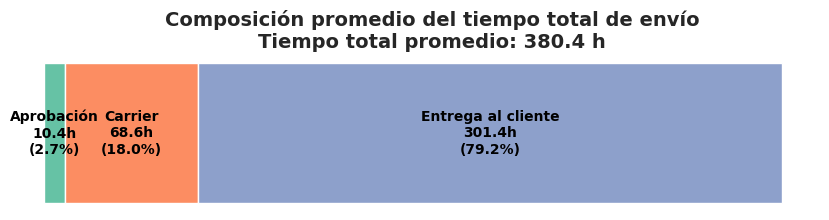

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

orders_delivered = orders[orders['order_status'] == 'delivered']

# Promedios
avg_approval = orders['time_to_approval'].mean()
avg_carrier = orders['time_to_carrier'].mean()
avg_delivery = orders['time_to_delivery'].mean()
total_avg_time = avg_approval + avg_carrier + avg_delivery

# Datos
stages = ['Aprobación', 'Carrier', 'Entrega al cliente']
values = [avg_approval, avg_carrier, avg_delivery]
percent = [v / sum(values) * 100 for v in values]
colors = sns.color_palette("Set2", n_colors=3)

# Gráfico de barra horizontal apilada
fig, ax = plt.subplots(figsize=(10, 2))
left = 0
for val, pct, stage, color in zip(values, percent, stages, colors):
    ax.barh(0, val, left=left, color=color, edgecolor='white', height=0.5)
    ax.text(left + val/2, 0, f'{stage}\n{val:.1f}h\n({pct:.1f}%)',
            ha='center', va='center', fontweight='bold', color='black', fontsize=10)
    left += val

# Quitar ejes y ticks
ax.axis('off')

# Título con tiempo total promedio
plt.title(f'Composición promedio del tiempo total de envío\nTiempo total promedio: {total_avg_time:.1f} h',
          fontsize=14, fontweight='bold')
plt.show()



Matriz de correlación:
                   time_to_approval  time_to_carrier  time_to_delivery  \
time_to_approval          1.000000        -0.008538          0.080176   
time_to_carrier          -0.008538         1.000000          0.388783   
time_to_delivery          0.080176         0.388783          1.000000   
total_time                0.147633         0.627231          0.958599   

                  total_time  
time_to_approval    0.147633  
time_to_carrier     0.627231  
time_to_delivery    0.958599  
total_time          1.000000  


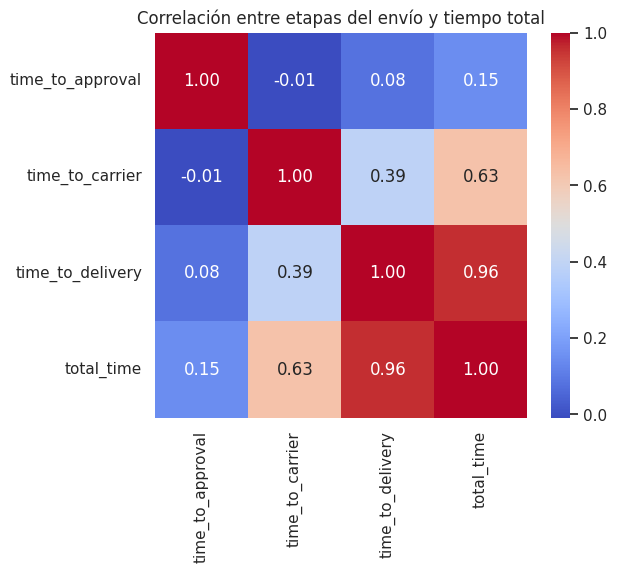

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Solo pedidos entregados
orders_delivered = orders[orders['order_status'] == 'delivered'].copy()

# Crear columna de tiempo total
orders_delivered['total_time'] = (
    orders_delivered['time_to_approval'] +
    orders_delivered['time_to_carrier'] +
    orders_delivered['time_to_delivery']
)

# Seleccionar columnas de interés
cols = ['time_to_approval', 'time_to_carrier', 'time_to_delivery', 'total_time']

# Calcular matriz de correlación
corr_matrix = orders_delivered[cols].corr()

print("Matriz de correlación:\n", corr_matrix)

# Graficar heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlación entre etapas del envío y tiempo total")
plt.show()



In [ ]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,time_to_approval,time_to_carrier,time_to_delivery,delivery_delay
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.178333,56.795833,202.477778,-170.579722
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,30.713889,11.109167,330.768889,-128.537500
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0.276111,4.910278,225.461111,-413.891944
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0.298056,89.900000,317.010000,-311.521667
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.030556,21.434722,68.973056,-221.716111
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,0.000000,25.399444,197.232222,-248.866389
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,0.194167,34.201389,532.649444,-30.367778
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,0.292500,29.802778,596.626111,-132.595278
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0.131667,89.978333,410.074167,-480.451667


In [ ]:
from scipy.stats import f_oneway

# Filtrar solo clientes con al menos 5 pedidos con delivery_delay no nulo
orders_delays = orders[['customer_id','delivery_delay']].dropna()
customer_groups = orders_delays.groupby('customer_id').filter(lambda x: len(x) >= 5)

# Agrupar nuevamente por cliente y obtener listas de delays
arrays = [group['delivery_delay'].values for _, group in customer_groups.groupby('customer_id')]

# ANOVA solo si hay al menos 2 clientes
if len(arrays) >= 2:
    f_stat, p_val = f_oneway(*arrays)
    print(f"F-statistic: {f_stat:.2f}, p-value: {p_val:.3f}")
else:
    print("No hay suficientes clientes con múltiples pedidos para ANOVA")



No hay suficientes clientes con múltiples pedidos para ANOVA


## B.7 Seller

# C. Ingeniería de Datos

En esta sección se aplican transformaciones adicionales y se generan nuevas variables (features) que potencian los modelos.  
Algunas de estas tareas ya se realizaron de manera parcial durante la limpieza y unión de datasets, y aquí se consolidan de forma explícita.

- Generar nuevas variables derivadas de las existentes (features).  
- Transformar variables de fechas, normalizar valores o codificar categorías.  
- Enriquecer el dataset con información externa si es relevante.


## C.1 Competitividad precios-seller


Comn valores normalizados de los precios

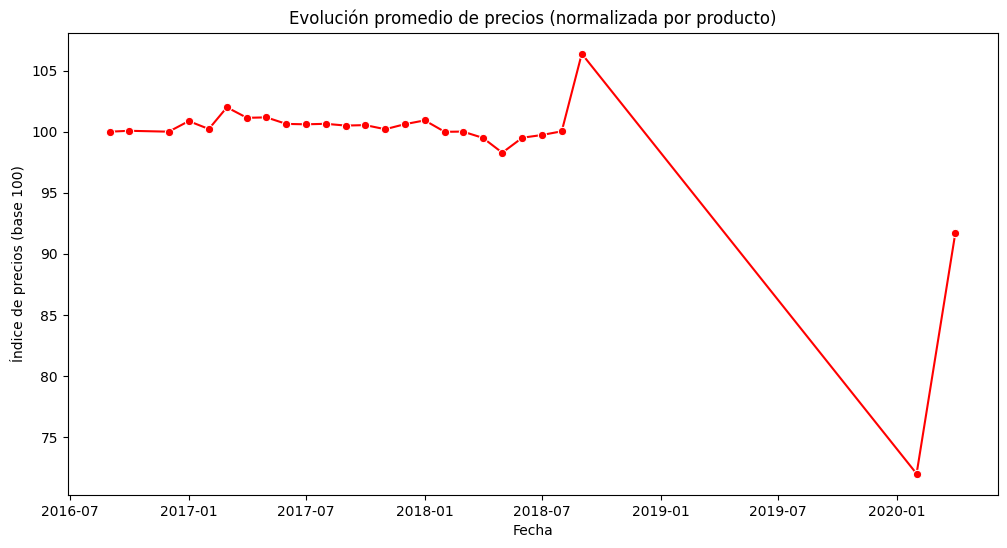

In [ ]:
# Asegurar fecha
order_items_distance["shipping_limit_date"] = pd.to_datetime(order_items_distance["shipping_limit_date"])

# Agrupar por producto y fecha (precio promedio de cada producto por día)
product_price_time = order_items_distance.groupby(
    ["product_id", "shipping_limit_date"]
)["price"].mean().reset_index()

# Normalizar cada producto al precio inicial (primer valor)
product_price_time["price_norm"] = product_price_time.groupby("product_id")["price"].transform(
    lambda x: x / x.iloc[0] * 100  # índice base 100
)

# Calcular el promedio de los índices por fecha
avg_index_over_time = product_price_time.groupby("shipping_limit_date")["price_norm"].mean().reset_index()

# Suavizar por mes
avg_index_over_time["month"] = avg_index_over_time["shipping_limit_date"].dt.to_period("M").dt.to_timestamp()
avg_index_monthly = avg_index_over_time.groupby("month")["price_norm"].mean().reset_index()

# Graficar evolución
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_index_monthly, x="month", y="price_norm", marker="o", color="red")
plt.title("Evolución promedio de precios (normalizada por producto)")
plt.xlabel("Fecha")
plt.ylabel("Índice de precios (base 100)")
plt.show()

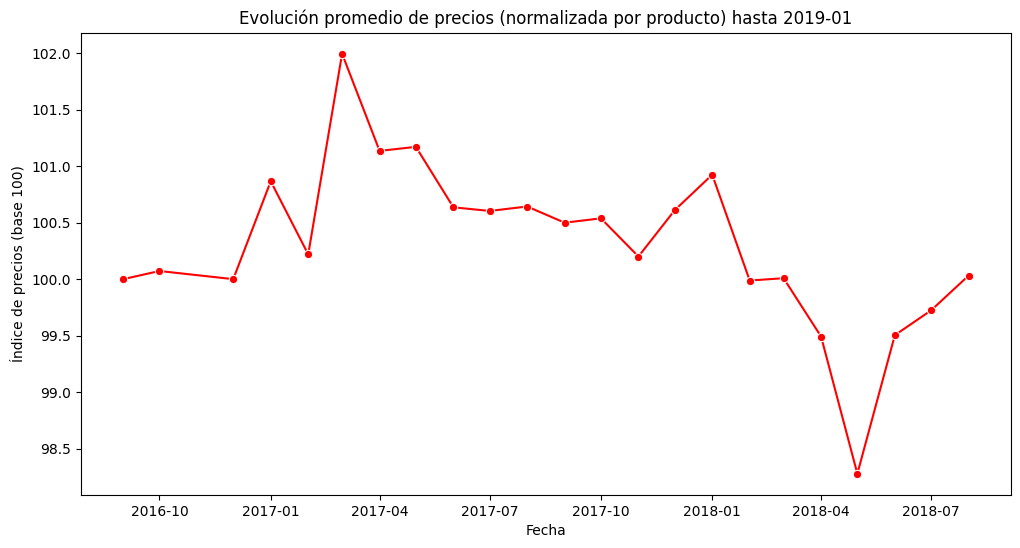

In [ ]:
## Fijar límites de fecha, para eliminar outaier


# Asegurar fecha
order_items_distance["shipping_limit_date"] = pd.to_datetime(order_items_distance["shipping_limit_date"])

# Filtrar hasta 2019-01
data_filtered = order_items_distance[order_items_distance["shipping_limit_date"] <= "2018-08-31"]

# Agrupar por producto y fecha (precio promedio de cada producto por día)
product_price_time = data_filtered.groupby(
    ["product_id", "shipping_limit_date"]
)["price"].mean().reset_index()

# Normalizar cada producto al precio inicial (primer valor)
product_price_time["price_norm"] = product_price_time.groupby("product_id")["price"].transform(
    lambda x: x / x.iloc[0] * 100  # índice base 100
)

# Calcular el promedio de los índices por fecha
avg_index_over_time = product_price_time.groupby("shipping_limit_date")["price_norm"].mean().reset_index()

# Suavizar por mes
avg_index_over_time["month"] = avg_index_over_time["shipping_limit_date"].dt.to_period("M").dt.to_timestamp()
avg_index_monthly = avg_index_over_time.groupby("month")["price_norm"].mean().reset_index()

# Graficar evolución
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_index_monthly, x="month", y="price_norm", marker="o", color="red")
plt.title("Evolución promedio de precios (normalizada por producto) hasta 2019-01")
plt.xlabel("Fecha")
plt.ylabel("Índice de precios (base 100)")
plt.show()



In [ ]:
import numpy as np
from sklearn.metrics import r2_score
from numpy.polynomial.polynomial import Polynomial

# --- Preparar los datos ---
x = np.arange(len(avg_index_monthly))  # índice temporal
y = avg_index_monthly["price_norm"].values

# --- Ajustar una recta (polinomio de grado 1) ---
coef = np.polyfit(x, y, deg=1)   # coef[0] = pendiente, coef[1] = intercepto
poly1d_fn = np.poly1d(coef)      # función de la recta

# --- Pendiente de la tendencia ---
pendiente = coef[0]

# --- R² de la tendencia ---
r2 = r2_score(y, poly1d_fn(x))

# --- Variación acumulada ---
variacion = (y[-1] - y[0]) / y[0] * 100

print(f"📈 Pendiente: {pendiente:.4f} puntos índice por día")
print(f"📊 R² de la tendencia: {r2:.3f}")
print(f"🔄 Variación acumulada entre inicio y fin: {variacion:.2f}%")


📈 Pendiente: -0.0523 puntos índice por día
📊 R² de la tendencia: 0.236
🔄 Variación acumulada entre inicio y fin: 0.03%


Los precios promedio por producto son bastante estables en el tiempo

La variación acumulada cercana a 0% y la pendiente casi plana indican que, en general, los productos no suben ni bajan significativamente.

Esto sugiere que los vendedores no cambian de forma agresiva los precios de manera temporal, sino que mantienen un rango de precio constante.

### Conclusión práctica

Para un mismo producto, la dispersión de precios es principalmente entre vendedores, no temporal.

Si quisieras agruparlos, podrías clasificar sellers como:

“Más baratos que la media”

“Precio cercano a la media”

“Más caros que la media”

Podemoss calcular la competitividad-precio de cada seller teniendo en cuenta el precio de cada producto que vende, en vez de usar un promedio general.

La idea sería:

* Para cada producto, calcular el precio promedio entre todos los sellers.

* Para cada seller, calcular la desviación de su precio respecto al promedio del producto.

Luego agrupar por seller y sacar indicadores como:

**Promedio de desviación:** si es negativo → vende más barato que la media, positivo → más caro.

**Rango de precios:** si tiene mucha variabilidad en su estrategia de precios.

In [ ]:
# Para cada producto, calcular el precio promedio
product_mean_price = order_items_distance.groupby("product_id")["price"].mean().rename("product_avg_price")

# Unir con los datos originales
order_items_distance = order_items_distance.merge(product_mean_price, on="product_id")

# Calcular desviación de cada seller respecto al promedio del producto
order_items_distance["price_diff"] = order_items_distance["price"] - order_items_distance["product_avg_price"]

# Agrupar por seller para ver su “competitividad promedio”
seller_competitiveness = order_items_distance.groupby("seller_id")["price_diff"].mean().reset_index()
seller_competitiveness.rename(columns={"price_diff": "avg_price_diff"}, inplace=True)

# Clasificar vendedores
def categorize(diff):
    if diff < -1:  # ejemplo: vende más barato que el promedio
        return "Barato"
    elif diff > 1:  # vende más caro
        return "Caro"
    else:
        return "Medio"

seller_competitiveness["category"] = seller_competitiveness["avg_price_diff"].apply(categorize)

print(seller_competitiveness.head())

                          seller_id  avg_price_diff category
0  0015a82c2db000af6aaaf3ae2ecb0532    0.000000e+00    Medio
1  001cca7ae9ae17fb1caed9dfb1094831   -1.949116e-01    Medio
2  001e6ad469a905060d959994f1b41e4f    0.000000e+00    Medio
3  002100f778ceb8431b7a1020ff7ab48f   -1.614870e-16    Medio
4  003554e2dce176b5555353e4f3555ac8    0.000000e+00    Medio


In [ ]:
std_diff = seller_competitiveness["avg_price_diff"].std()

def categorize_std(diff):
    if diff < -0.5*std_diff:
        return "Barato"
    elif diff > 0.5*std_diff:
        return "Caro"
    else:
        return "Medio"

seller_competitiveness["category"] = seller_competitiveness["avg_price_diff"].apply(categorize_std)


seller_range = order_items_distance.groupby("seller_id")["price"].agg(["min","max"]).reset_index()


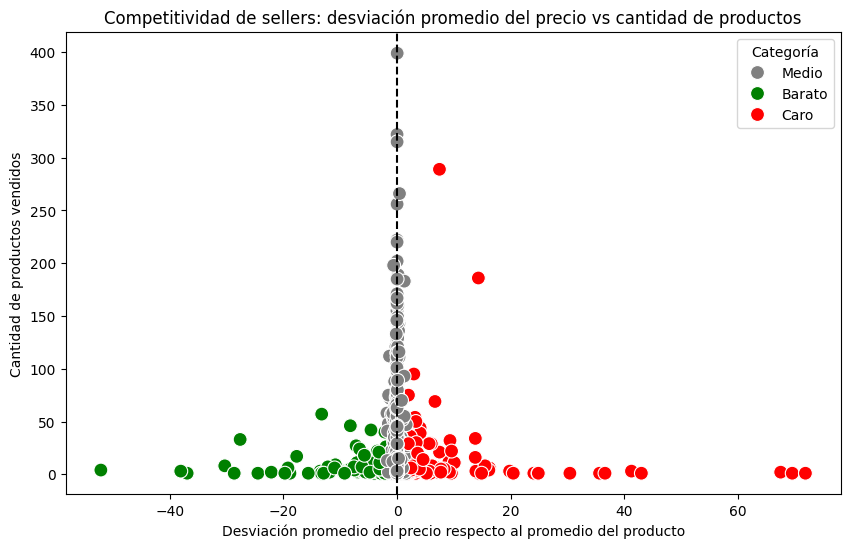

In [ ]:
# Contar cantidad de productos por seller

# Crear un resumen por seller
seller_summary = seller_competitiveness.merge(
    seller_range, on="seller_id"
)

seller_summary["num_products"] = order_items_distance.groupby("seller_id")["product_id"].nunique().values

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=seller_summary,
    x="avg_price_diff",
    y="num_products",
    hue="category",
    palette={"Barato":"green","Medio":"gray","Caro":"red"},
    s=100
)
plt.axvline(0, color="black", linestyle="--")  # promedio
plt.title("Competitividad de sellers: desviación promedio del precio vs cantidad de productos")
plt.xlabel("Desviación promedio del precio respecto al promedio del producto")
plt.ylabel("Cantidad de productos vendidos")
plt.legend(title="Categoría")
plt.show()


In [ ]:
# Contar cuántos precios distintos hay por producto
product_price_counts = order_items_distance.groupby("product_id")["price"].nunique().reset_index()
product_price_counts.rename(columns={"price":"num_distinct_prices"}, inplace=True)

# Mostrar los primeros 10 productos
print(product_price_counts.sort_values("num_distinct_prices", ascending=False).head(10))


                             product_id  num_distinct_prices
8785   437c05a395e9e47f9762e677a7068ce7                   31
27128  d285360f29ac7fd97640bf0baef03de0                   29
28970  e0d64dcfaa3b6db5c54ca298ae101d05                   27
14366  6f3b5b605d91b7439c5e3f5a8dffeea7                   23
13101  656e0eca68dcecf6a31b8ececfabe3e8                   23
29513  e53e557d5a159f5aa2c5e995dfdf244b                   21
13626  69455f41626a745aea9ee9164cb9eafd                   21
10867  53b36df67ebb7c41585e8d54d6772e08                   21
9121   461f43be3bdf8844e65b62d9ac2c7a5a                   20
8677   4298b7e67dc399c200662b569563a2b2                   20


In [ ]:
# Contar cuántos precios distintos tiene cada producto
product_price_counts = order_items_distance.groupby("product_id")["price"].nunique().reset_index()
product_price_counts.rename(columns={"price":"num_distinct_prices"}, inplace=True)

# Categorizar
def price_category(n):
    if n == 1:
        return "1 precio"
    elif 2 <= n <= 3:
        return "2-3 precios"
    elif n > 5:
        return ">5 precios"
    else:  # 4 o 5 precios
        return "4-5 precios"

product_price_counts["category"] = product_price_counts["num_distinct_prices"].apply(price_category)

# Calcular porcentajes
percentages = product_price_counts["category"].value_counts(normalize=True) * 100
percentages = percentages.round(2)

print(percentages)



category
1 precio       82.09
2-3 precios    15.70
4-5 precios     1.60
>5 precios      0.61
Name: proportion, dtype: float64


In [ ]:
# Contar cuántos precios distintos tiene cada producto
product_price_counts = order_items_distance.groupby("product_id")["price"].nunique().reset_index()
product_price_counts.rename(columns={"price":"num_distinct_prices"}, inplace=True)

# Categorizar
def price_category(n):
    if n == 1:
        return "1 precio"
    elif 2 <= n <= 3:
        return "2-3 precios"
    elif n > 5:
        return ">5 precios"
    else:  # 4 o 5 precios
        return "4-5 precios"

product_price_counts["category"] = product_price_counts["num_distinct_prices"].apply(price_category)

# Contar la cantidad de productos por categoría
counts = product_price_counts["category"].value_counts().sort_index()

print(counts)


category
1 precio       27051
2-3 precios     5172
4-5 precios      527
>5 precios       201
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Contar cuántos precios distintos hay por producto
product_price_counts = order_items_distance.groupby("product_id")["price"].nunique().reset_index()
product_price_counts.rename(columns={"price":"num_distinct_prices"}, inplace=True)

# Mostrar los primeros 10 productos como ejemplo
print(product_price_counts.head(-10))


                             product_id  num_distinct_prices
0      00066f42aeeb9f3007548bb9d3f33c38                    1
1      00088930e925c41fd95ebfe695fd2655                    1
2      0009406fd7479715e4bef61dd91f2462                    1
3      000b8f95fcb9e0096488278317764d19                    1
4      000d9be29b5207b54e86aa1b1ac54872                    1
...                                 ...                  ...
32936  ffe75578163d45caa52bca3529cb511e                    1
32937  ffe8083298f95571b4a66bfbc1c05524                    2
32938  ffe9468f4d890db80b7231e86931ff37                    1
32939  ffeb228c521d5464d1f71444da96c446                    1
32940  ffedbd68fa6f44e788ff6c2db8094715                    1

[32941 rows x 2 columns]


### C.1.1 Relacion entre precio y review

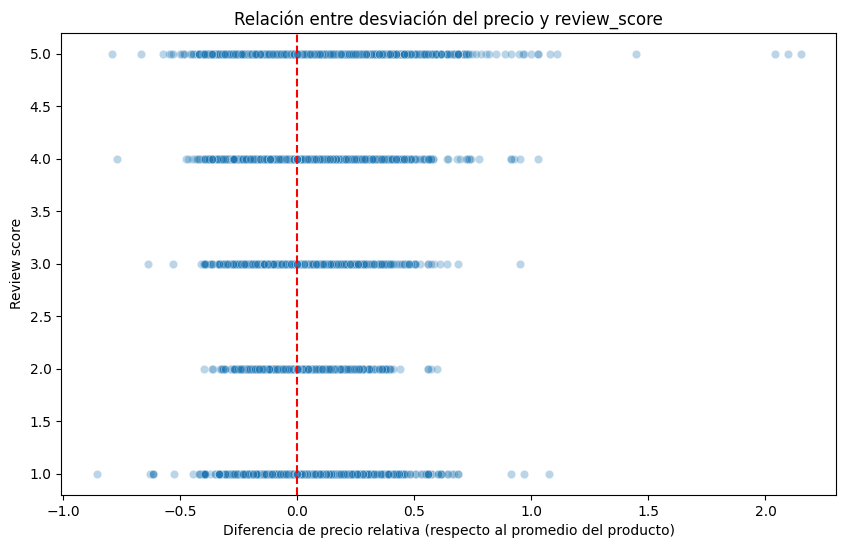

Correlación entre diferencia de precio y review_score: 0.001


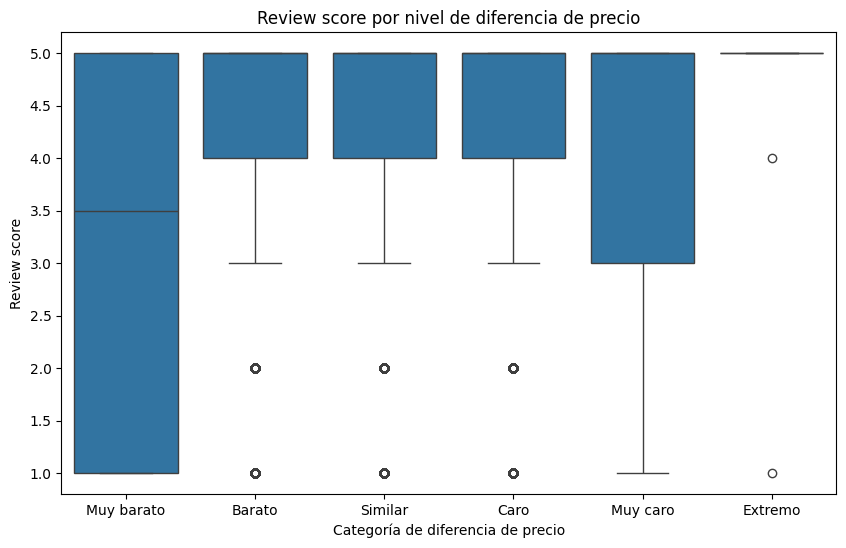

                     count      mean       std  min  25%  50%  75%  max
price_diff_group                                                       
Muy barato            16.0  3.187500  1.869715  1.0  1.0  3.5  5.0  5.0
Barato              5700.0  4.046316  1.362765  1.0  4.0  5.0  5.0  5.0
Similar           101514.0  4.030597  1.389921  1.0  4.0  5.0  5.0  5.0
Caro                4961.0  4.061278  1.367639  1.0  4.0  5.0  5.0  5.0
Muy caro             171.0  3.900585  1.493732  1.0  3.0  5.0  5.0  5.0
Extremo               10.0  4.500000  1.269296  1.0  5.0  5.0  5.0  5.0


/tmp/ipython-input-3548360496.py:86: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_review_by_price_group = order_items_price_review.groupby("price_diff_group")["review_score"].describe()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------------------------
# 1️⃣ Unir review_score a cada ítem por order_id
# -------------------------------------------------
order_items_price_review = order_items_distance.merge(
    order_reviews[['order_id', 'review_score']],
    on='order_id',
    how='left'
)

# -------------------------------------------------
# 2️⃣ Calcular el precio promedio por producto
# -------------------------------------------------
product_avg_price = order_items_distance.groupby("product_id")["price"].mean().reset_index()
product_avg_price.rename(columns={"price": "avg_product_price"}, inplace=True)

# -------------------------------------------------
# 3️⃣ Unir el precio promedio al dataset
# -------------------------------------------------
order_items_price_review = order_items_price_review.merge(
    product_avg_price,
    on="product_id",
    how="left"
)

# -------------------------------------------------
# 4️⃣ Calcular la diferencia relativa de precio de cada ítem
# -------------------------------------------------
order_items_price_review["price_diff_ratio"] = (
    (order_items_price_review["price"] - order_items_price_review["avg_product_price"])
    / order_items_price_review["avg_product_price"]
)

# -------------------------------------------------
# 5️⃣ Ver relación entre diferencia de precio y review_score
# -------------------------------------------------
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=order_items_price_review,
    x="price_diff_ratio",
    y="review_score",
    alpha=0.3
)
plt.axvline(0, color="red", linestyle="--")
plt.title("Relación entre desviación del precio y review_score")
plt.xlabel("Diferencia de precio relativa (respecto al promedio del producto)")
plt.ylabel("Review score")
plt.show()

# -------------------------------------------------
# 6️⃣ Calcular correlación numérica
# -------------------------------------------------
corr = order_items_price_review["price_diff_ratio"].corr(order_items_price_review["review_score"])
print(f"Correlación entre diferencia de precio y review_score: {corr:.3f}")

# -------------------------------------------------
# 7️⃣ Agrupar por tramos de diferencia de precio
# -------------------------------------------------
order_items_price_review["price_diff_group"] = pd.cut(
    order_items_price_review["price_diff_ratio"],
    bins=[-1, -0.5, -0.1, 0.1, 0.5, 1, 3],
    labels=["Muy barato", "Barato", "Similar", "Caro", "Muy caro", "Extremo"]
)

# -------------------------------------------------
# 8️⃣ Boxplot para ver la tendencia
# -------------------------------------------------
plt.figure(figsize=(10,6))
sns.boxplot(
    data=order_items_price_review,
    x="price_diff_group",
    y="review_score",
    order=["Muy barato", "Barato", "Similar", "Caro", "Muy caro", "Extremo"]
)
plt.title("Review score por nivel de diferencia de precio")
plt.xlabel("Categoría de diferencia de precio")
plt.ylabel("Review score")
plt.show()

# -------------------------------------------------
# 9️⃣ Estadísticos descriptivos por grupo
# -------------------------------------------------
stats_review_by_price_group = order_items_price_review.groupby("price_diff_group")["review_score"].describe()
print(stats_review_by_price_group)



Score promedio global: 4.03


/tmp/ipython-input-3594369437.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


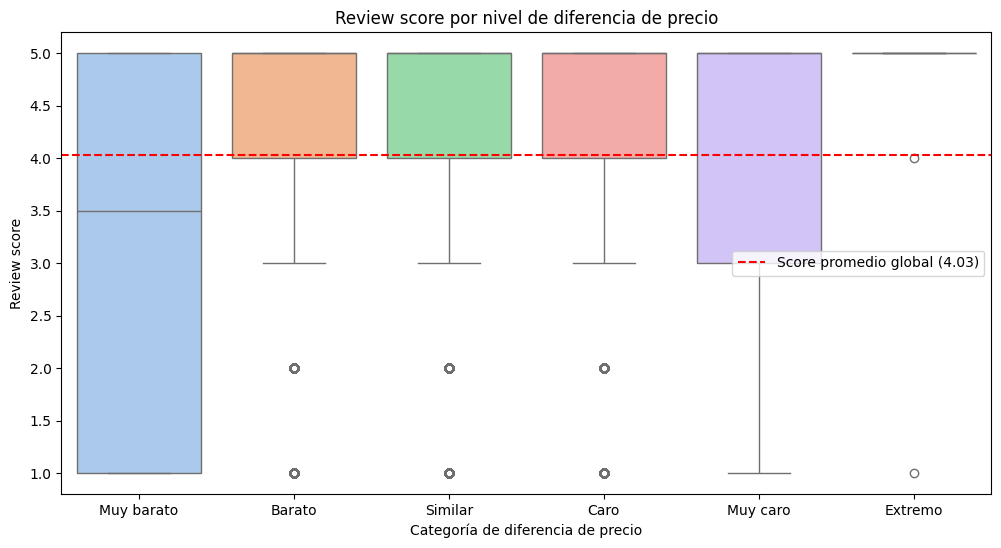

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular score promedio global
mean_score = order_items_price_review["review_score"].mean()
print(f"Score promedio global: {mean_score:.2f}")

# Boxplot por categoría de diferencia de precio
plt.figure(figsize=(12,6))
sns.boxplot(
    data=order_items_price_review,
    x="price_diff_group",
    y="review_score",
    order=["Muy barato", "Barato", "Similar", "Caro", "Muy caro", "Extremo"],
    palette="pastel"
)

# Línea de referencia del promedio global
plt.axhline(mean_score, color='red', linestyle='--', label=f'Score promedio global ({mean_score:.2f})')

plt.title("Review score por nivel de diferencia de precio")
plt.xlabel("Categoría de diferencia de precio")
plt.ylabel("Review score")
plt.legend()
plt.show()


In [ ]:
 order_items_price_review

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,customer_zip_code_prefix,customer_state,...,geolocation_lng_customer,seller_zip_code_prefix,seller_state,geolocation_lat_seller,geolocation_lng_seller,distance_km,review_score,avg_product_price,price_diff_ratio,price_diff_group
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,28013,RJ,...,-41.309633,27277,SP,-22.496953,-44.127492,301.504681,5.0,59.233333,-0.005627,Similar
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,15775,SP,...,-50.903424,3471,SP,-23.565096,-46.518565,585.563937,4.0,239.900000,0.000000,Similar
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,35661,MG,...,-44.593326,37564,MG,-22.262584,-46.171124,312.343511,5.0,199.000000,0.000000,Similar
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,12952,SP,...,-46.611654,14403,SP,-20.553624,-47.387359,293.168420,4.0,12.990000,0.000000,Similar
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,13226,SP,...,-46.827614,87900,PR,-22.929384,-53.135873,646.163463,5.0,202.400000,-0.012352,Similar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113309,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,65077,MA,...,-44.297761,88303,SC,-26.912574,-48.673980,2754.537709,5.0,291.185319,0.030237,Similar
113310,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,81690,PR,...,-49.309115,1206,SP,-23.535864,-46.642819,351.729420,5.0,355.000000,-0.014085,Similar
113311,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,4039,SP,...,-46.643923,80610,PR,-25.469955,-49.289821,339.056961,5.0,93.157143,0.072382,Similar
113312,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,13289,SP,...,-46.979782,4733,SP,-23.635530,-46.694031,72.335998,5.0,55.899091,0.001626,Similar


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo columnas numéricas relevantes
numeric_cols = [
    'review_score',
    'distance_km',
    'delivery_delay',
    'time_to_customer_delivery',
    'product_weight_g',
    'product_volume_cm3',
    'product_density_g_cm3',
    'price',
    'freight_value'
]

# Filtrar filas sin NaN en estas columnas
df_corr = order_items_price_review[numeric_cols].dropna()

# Calcular matriz de correlación
corr_matrix = df_corr.corr()

# Mostrar heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de correlación de variables numéricas")
plt.show()

# Opcional: pairplot para variables seleccionadas
selected_vars = ['review_score', 'price', 'distance_km', 'delivery_delay']
sns.pairplot(order_items_price_review[selected_vars].dropna(), diag_kind='kde', corner=True)
plt.suptitle("Relaciones bivariadas entre variables clave", y=1.02)
plt.show()


KeyError: "['delivery_delay', 'time_to_customer_delivery', 'product_weight_g', 'product_volume_cm3', 'product_density_g_cm3'] not in index"

# D. Analisis Unión de Dataset

* Integrar las distintas tablas en un dataset final, preparando el modelado.
* Justificación de las uniones
* Exploraciones finales sobre el Dataset consolidado  

In [ ]:
# Libreria

# Manejo de datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score


## D.1 Carga de nuevo Dataset

In [ ]:
# Customer Geo

# ID del archivo en Drive
file_id = '1nRkwfOjYEfCJwG9Hfs7Si7rQr986OcuT'

# Enlace de descarga directa
csv_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Leer el CSV
customer_geo = pd.read_csv(csv_url)

print(customer_geo.info())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_id                  99441 non-null  object 
 1   customer_unique_id           99441 non-null  object 
 2   customer_zip_code_prefix     99441 non-null  int64  
 3   customer_city                99441 non-null  object 
 4   customer_state               99441 non-null  object 
 5   geolocation_zip_code_prefix  99153 non-null  float64
 6   geolocation_lat              99388 non-null  float64
 7   geolocation_lng              99388 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.1+ MB
None




In [ ]:
# Seller Geo

# ID del archivo en Drive
file_id = '1fwn-DyAx4cqoqzmM6W2gIuKpmG47ZMbr'

# Enlace de descarga directa
csv_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Leer el CSV
seller_geo = pd.read_csv(csv_url)

print(seller_geo.info())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   seller_id                    3095 non-null   object 
 1   seller_zip_code_prefix       3095 non-null   int64  
 2   seller_city                  3095 non-null   object 
 3   seller_state                 3095 non-null   object 
 4   geolocation_zip_code_prefix  3088 non-null   float64
 5   geolocation_lat              3095 non-null   float64
 6   geolocation_lng              3095 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 169.4+ KB
None




In [ ]:
# Product filt

# ID del archivo en Drive
file_id = '1jfumPOhIiVFaqWF6LxIjwBF4fks6YYgk'

# Enlace de descarga directa
csv_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Leer el CSV
product_filt = pd.read_csv(csv_url)

print(product_filt.info())
print('\n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32945 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
 9   product_volume_cm3          32949 non-null  float64
 10  product_density_g_cm3       32945 non-null  float64
dtypes: float64(9), object(2)
memory usage: 2.8+ MB
None




In [ ]:
# Order payment filt

# ID del archivo en Drive
file_id = '17h1uWr0YOUszmyV8whsl0sRKd9BiNT8p'

# Enlace de descarga directa
csv_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Leer el CSV
order_payment_filt = pd.read_csv(csv_url)

print(order_payment_filt.info())
print('\n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99440 entries, 0 to 99439
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      99440 non-null  object 
 1   total_pago    99440 non-null  float64
 2   num_pagos     99440 non-null  int64  
 3   payment_type  99440 non-null  object 
 4   cuotas        99440 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 3.8+ MB
None




In [ ]:
# Order items distance

# ID del archivo en Drive
file_id = '1gdSsIGxugZbm5r6y59nwrOM0LbCNtVed'

# Enlace de descarga directa
csv_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Leer el CSV
order_items_distance = pd.read_csv(csv_url)

print(order_items_distance.info())
print('\n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  112650 non-null  object 
 1   order_item_id             112650 non-null  int64  
 2   product_id                112650 non-null  object 
 3   seller_id                 112650 non-null  object 
 4   shipping_limit_date       112650 non-null  object 
 5   price                     112650 non-null  float64
 6   freight_value             112650 non-null  float64
 7   customer_id               112650 non-null  object 
 8   customer_zip_code_prefix  112650 non-null  int64  
 9   customer_state            112650 non-null  object 
 10  geolocation_lat_customer  112598 non-null  float64
 11  geolocation_lng_customer  112598 non-null  float64
 12  seller_zip_code_prefix    112650 non-null  int64  
 13  seller_state              112650 non-null  o

In [ ]:
## Review

# ID del archivo en Drive
file_id = '1OG_9q8IzEDz5CsvYH-8NB6gk6h9h6JWL'

# Enlace de descarga directa
csv_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Leer el CSV
order_reviews_filt = pd.read_csv(csv_url)

print(order_reviews_filt.info())
print('\n')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   review_id                99224 non-null  object 
 1   order_id                 99224 non-null  object 
 2   review_score             99224 non-null  int64  
 3   review_comment_title     11568 non-null  object 
 4   review_comment_message   40977 non-null  object 
 5   review_creation_date     99224 non-null  object 
 6   review_answer_timestamp  99224 non-null  object 
 7   has_comment              99224 non-null  int64  
 8   has_comment_title        99224 non-null  int64  
 9   has_any_comment          99224 non-null  int64  
 10  year_month               99224 non-null  object 
 11  response_time_days       99224 non-null  float64
 12  response_time_category   99214 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 9.8+ MB
None




In [ ]:
## Orders

# ID del archivo en Drive
file_id = '1O7jZ-2d5Yb6XLJCi3-63G1BY_h7DV2qP'

# Enlace de descarga directa
csv_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Leer el CSV
order_filt = pd.read_csv(csv_url)

print(order_filt.info())
print('\n')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99441 non-null  object 
 1   customer_id                    99441 non-null  object 
 2   order_status                   99441 non-null  object 
 3   order_purchase_timestamp       99441 non-null  object 
 4   order_approved_at              99281 non-null  object 
 5   order_delivered_carrier_date   97658 non-null  object 
 6   order_delivered_customer_date  96476 non-null  object 
 7   order_estimated_delivery_date  99441 non-null  object 
 8   time_to_approval               99281 non-null  float64
 9   time_to_carrier                96285 non-null  float64
 10  time_to_delivery               96476 non-null  float64
 11  delivery_delay                 96476 non-null  float64
dtypes: float64(4), object(8)
memory usage: 9.1+ MB

## D.2 Analisis de precios


Comn valores normalizados de los precios

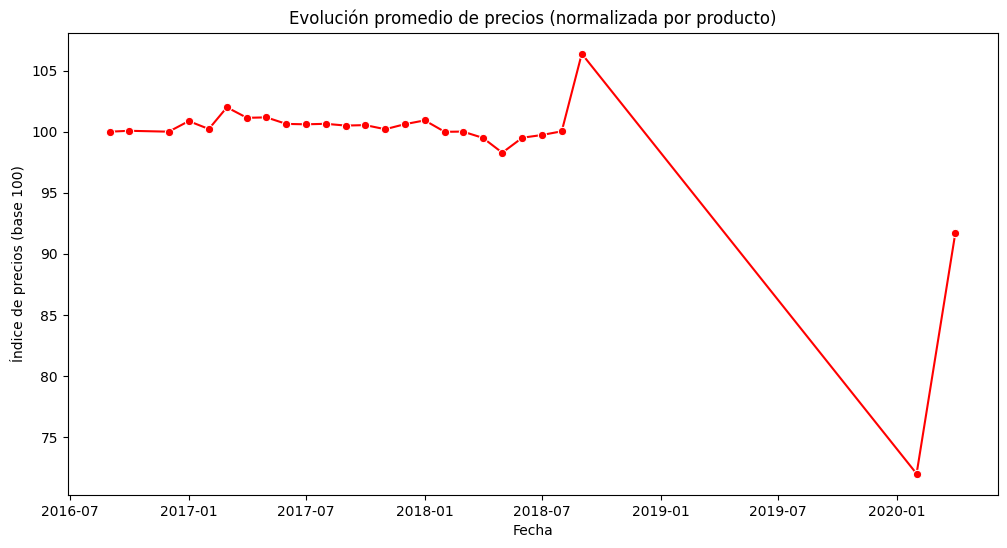

In [ ]:
# Asegurar fecha
order_items_distance["shipping_limit_date"] = pd.to_datetime(order_items_distance["shipping_limit_date"])

# Agrupar por producto y fecha (precio promedio de cada producto por día)
product_price_time = order_items_distance.groupby(
    ["product_id", "shipping_limit_date"]
)["price"].mean().reset_index()

# Normalizar cada producto al precio inicial (primer valor)
product_price_time["price_norm"] = product_price_time.groupby("product_id")["price"].transform(
    lambda x: x / x.iloc[0] * 100  # índice base 100
)

# Calcular el promedio de los índices por fecha
avg_index_over_time = product_price_time.groupby("shipping_limit_date")["price_norm"].mean().reset_index()

# Suavizar por mes
avg_index_over_time["month"] = avg_index_over_time["shipping_limit_date"].dt.to_period("M").dt.to_timestamp()
avg_index_monthly = avg_index_over_time.groupby("month")["price_norm"].mean().reset_index()

# Graficar evolución
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_index_monthly, x="month", y="price_norm", marker="o", color="red")
plt.title("Evolución promedio de precios (normalizada por producto)")
plt.xlabel("Fecha")
plt.ylabel("Índice de precios (base 100)")
plt.show()

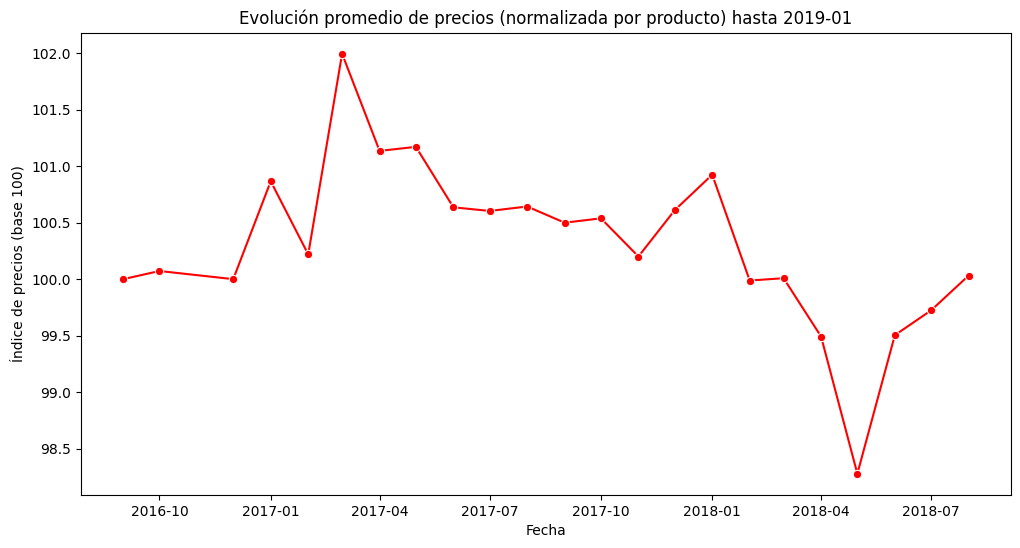

In [ ]:
## Fijar límites de fecha, para eliminar outaier


# Asegurar fecha
order_items_distance["shipping_limit_date"] = pd.to_datetime(order_items_distance["shipping_limit_date"])

# Filtrar hasta 2019-01
data_filtered = order_items_distance[order_items_distance["shipping_limit_date"] <= "2018-08-31"]

# Agrupar por producto y fecha (precio promedio de cada producto por día)
product_price_time = data_filtered.groupby(
    ["product_id", "shipping_limit_date"]
)["price"].mean().reset_index()

# Normalizar cada producto al precio inicial (primer valor)
product_price_time["price_norm"] = product_price_time.groupby("product_id")["price"].transform(
    lambda x: x / x.iloc[0] * 100  # índice base 100
)

# Calcular el promedio de los índices por fecha
avg_index_over_time = product_price_time.groupby("shipping_limit_date")["price_norm"].mean().reset_index()

# Suavizar por mes
avg_index_over_time["month"] = avg_index_over_time["shipping_limit_date"].dt.to_period("M").dt.to_timestamp()
avg_index_monthly = avg_index_over_time.groupby("month")["price_norm"].mean().reset_index()

# Graficar evolución
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_index_monthly, x="month", y="price_norm", marker="o", color="red")
plt.title("Evolución promedio de precios (normalizada por producto) hasta 2019-01")
plt.xlabel("Fecha")
plt.ylabel("Índice de precios (base 100)")
plt.show()



In [ ]:
import numpy as np
from sklearn.metrics import r2_score
from numpy.polynomial.polynomial import Polynomial

# --- Preparar los datos ---
x = np.arange(len(avg_index_monthly))  # índice temporal
y = avg_index_monthly["price_norm"].values

# --- Ajustar una recta (polinomio de grado 1) ---
coef = np.polyfit(x, y, deg=1)   # coef[0] = pendiente, coef[1] = intercepto
poly1d_fn = np.poly1d(coef)      # función de la recta

# --- Pendiente de la tendencia ---
pendiente = coef[0]

# --- R² de la tendencia ---
r2 = r2_score(y, poly1d_fn(x))

# --- Variación acumulada ---
variacion = (y[-1] - y[0]) / y[0] * 100

print(f"📈 Pendiente: {pendiente:.4f} puntos índice por día")
print(f"📊 R² de la tendencia: {r2:.3f}")
print(f"🔄 Variación acumulada entre inicio y fin: {variacion:.2f}%")


📈 Pendiente: -0.0523 puntos índice por día
📊 R² de la tendencia: 0.236
🔄 Variación acumulada entre inicio y fin: 0.03%


Los precios promedio por producto son bastante estables en el tiempo

La variación acumulada cercana a 0% y la pendiente casi plana indican que, en general, los productos no suben ni bajan significativamente.

Esto sugiere que los vendedores no cambian de forma agresiva los precios de manera temporal, sino que mantienen un rango de precio constante.

### Conclusión práctica

Para un mismo producto, la dispersión de precios es principalmente entre vendedores, no temporal.

Si quisieras agruparlos, podrías clasificar sellers como:

“Más baratos que la media”

“Precio cercano a la media”

“Más caros que la media”

Podemoss calcular la competitividad-precio de cada seller teniendo en cuenta el precio de cada producto que vende, en vez de usar un promedio general.

La idea sería:

* Para cada producto, calcular el precio promedio entre todos los sellers.

* Para cada seller, calcular la desviación de su precio respecto al promedio del producto.

Luego agrupar por seller y sacar indicadores como:

**Promedio de desviación:** si es negativo → vende más barato que la media, positivo → más caro.

**Rango de precios:** si tiene mucha variabilidad en su estrategia de precios.

In [ ]:
# Para cada producto, calcular el precio promedio
product_mean_price = order_items_distance.groupby("product_id")["price"].mean().rename("product_avg_price")

# Unir con los datos originales
order_items_distance = order_items_distance.merge(product_mean_price, on="product_id")

# Calcular desviación de cada seller respecto al promedio del producto
order_items_distance["price_diff"] = order_items_distance["price"] - order_items_distance["product_avg_price"]

# Agrupar por seller para ver su “competitividad promedio”
seller_competitiveness = order_items_distance.groupby("seller_id")["price_diff"].mean().reset_index()
seller_competitiveness.rename(columns={"price_diff": "avg_price_diff"}, inplace=True)

# Clasificar vendedores
def categorize(diff):
    if diff < -1:  # ejemplo: vende más barato que el promedio
        return "Barato"
    elif diff > 1:  # vende más caro
        return "Caro"
    else:
        return "Medio"

seller_competitiveness["category"] = seller_competitiveness["avg_price_diff"].apply(categorize)

print(seller_competitiveness.head())

                          seller_id  avg_price_diff category
0  0015a82c2db000af6aaaf3ae2ecb0532    0.000000e+00    Medio
1  001cca7ae9ae17fb1caed9dfb1094831   -1.949116e-01    Medio
2  001e6ad469a905060d959994f1b41e4f    0.000000e+00    Medio
3  002100f778ceb8431b7a1020ff7ab48f   -1.614870e-16    Medio
4  003554e2dce176b5555353e4f3555ac8    0.000000e+00    Medio


In [ ]:
std_diff = seller_competitiveness["avg_price_diff"].std()

def categorize_std(diff):
    if diff < -0.5*std_diff:
        return "Barato"
    elif diff > 0.5*std_diff:
        return "Caro"
    else:
        return "Medio"

seller_competitiveness["category"] = seller_competitiveness["avg_price_diff"].apply(categorize_std)


seller_range = order_items_distance.groupby("seller_id")["price"].agg(["min","max"]).reset_index()


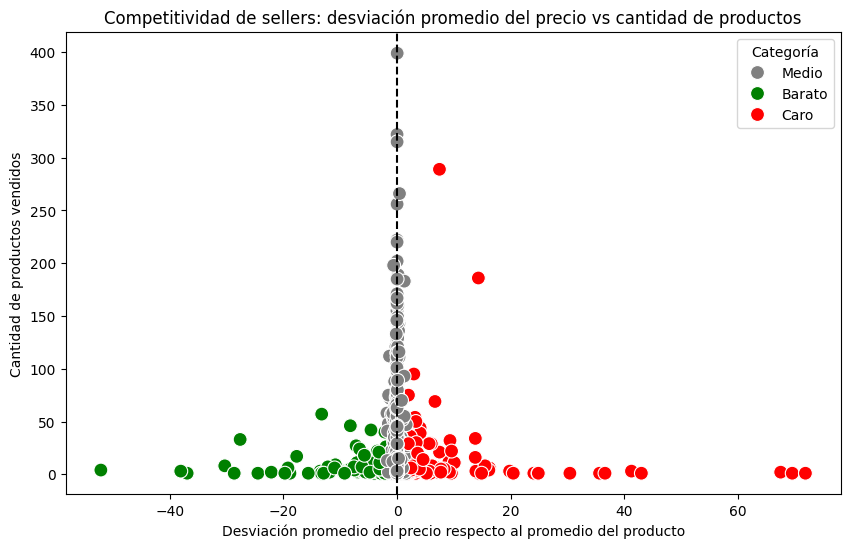

In [ ]:
# Contar cantidad de productos por seller

# Crear un resumen por seller
seller_summary = seller_competitiveness.merge(
    seller_range, on="seller_id"
)

seller_summary["num_products"] = order_items_distance.groupby("seller_id")["product_id"].nunique().values

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=seller_summary,
    x="avg_price_diff",
    y="num_products",
    hue="category",
    palette={"Barato":"green","Medio":"gray","Caro":"red"},
    s=100
)
plt.axvline(0, color="black", linestyle="--")  # promedio
plt.title("Competitividad de sellers: desviación promedio del precio vs cantidad de productos")
plt.xlabel("Desviación promedio del precio respecto al promedio del producto")
plt.ylabel("Cantidad de productos vendidos")
plt.legend(title="Categoría")
plt.show()


In [ ]:
# Contar cuántos precios distintos hay por producto
product_price_counts = order_items_distance.groupby("product_id")["price"].nunique().reset_index()
product_price_counts.rename(columns={"price":"num_distinct_prices"}, inplace=True)

# Mostrar los primeros 10 productos
print(product_price_counts.sort_values("num_distinct_prices", ascending=False).head(10))


                             product_id  num_distinct_prices
8785   437c05a395e9e47f9762e677a7068ce7                   31
27128  d285360f29ac7fd97640bf0baef03de0                   29
28970  e0d64dcfaa3b6db5c54ca298ae101d05                   27
14366  6f3b5b605d91b7439c5e3f5a8dffeea7                   23
13101  656e0eca68dcecf6a31b8ececfabe3e8                   23
29513  e53e557d5a159f5aa2c5e995dfdf244b                   21
13626  69455f41626a745aea9ee9164cb9eafd                   21
10867  53b36df67ebb7c41585e8d54d6772e08                   21
9121   461f43be3bdf8844e65b62d9ac2c7a5a                   20
8677   4298b7e67dc399c200662b569563a2b2                   20


In [ ]:
# Contar cuántos precios distintos tiene cada producto
product_price_counts = order_items_distance.groupby("product_id")["price"].nunique().reset_index()
product_price_counts.rename(columns={"price":"num_distinct_prices"}, inplace=True)

# Categorizar
def price_category(n):
    if n == 1:
        return "1 precio"
    elif 2 <= n <= 3:
        return "2-3 precios"
    elif n > 5:
        return ">5 precios"
    else:  # 4 o 5 precios
        return "4-5 precios"

product_price_counts["category"] = product_price_counts["num_distinct_prices"].apply(price_category)

# Calcular porcentajes
percentages = product_price_counts["category"].value_counts(normalize=True) * 100
percentages = percentages.round(2)

print(percentages)



category
1 precio       82.09
2-3 precios    15.70
4-5 precios     1.60
>5 precios      0.61
Name: proportion, dtype: float64


In [ ]:
# Contar cuántos precios distintos tiene cada producto
product_price_counts = order_items_distance.groupby("product_id")["price"].nunique().reset_index()
product_price_counts.rename(columns={"price":"num_distinct_prices"}, inplace=True)

# Categorizar
def price_category(n):
    if n == 1:
        return "1 precio"
    elif 2 <= n <= 3:
        return "2-3 precios"
    elif n > 5:
        return ">5 precios"
    else:  # 4 o 5 precios
        return "4-5 precios"

product_price_counts["category"] = product_price_counts["num_distinct_prices"].apply(price_category)

# Contar la cantidad de productos por categoría
counts = product_price_counts["category"].value_counts().sort_index()

print(counts)


category
1 precio       27051
2-3 precios     5172
4-5 precios      527
>5 precios       201
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Contar cuántos precios distintos hay por producto
product_price_counts = order_items_distance.groupby("product_id")["price"].nunique().reset_index()
product_price_counts.rename(columns={"price":"num_distinct_prices"}, inplace=True)

# Mostrar los primeros 10 productos como ejemplo
print(product_price_counts.head(-10))


                             product_id  num_distinct_prices
0      00066f42aeeb9f3007548bb9d3f33c38                    1
1      00088930e925c41fd95ebfe695fd2655                    1
2      0009406fd7479715e4bef61dd91f2462                    1
3      000b8f95fcb9e0096488278317764d19                    1
4      000d9be29b5207b54e86aa1b1ac54872                    1
...                                 ...                  ...
32936  ffe75578163d45caa52bca3529cb511e                    1
32937  ffe8083298f95571b4a66bfbc1c05524                    2
32938  ffe9468f4d890db80b7231e86931ff37                    1
32939  ffeb228c521d5464d1f71444da96c446                    1
32940  ffedbd68fa6f44e788ff6c2db8094715                    1

[32941 rows x 2 columns]


## C.2 Unión

In [ ]:


# Supongamos que quieres solo estas columnas del dataset products
cols_to_keep = [
    'product_id',
    'product_category_name',
    'product_description_lenght',
    'product_photos_qty',
    'product_weight_g',
    'product_volume_cm3',
    'product_density_g_cm3'
]

# Crear un nuevo DataFrame con solo esas columnas
products_selected = product_filt[cols_to_keep]

# Hacer merge con order_items_distance usando product_id
order_items_distance_product  = order_items_distance.merge(
    products_selected,
    on='product_id',
    how='left'  # left join para no perder registros de order_items_distance
)

# Verificar resultado
print(order_items_distance_product .info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    112650 non-null  object 
 1   order_item_id               112650 non-null  int64  
 2   product_id                  112650 non-null  object 
 3   seller_id                   112650 non-null  object 
 4   shipping_limit_date         112650 non-null  object 
 5   price                       112650 non-null  float64
 6   freight_value               112650 non-null  float64
 7   customer_id                 112650 non-null  object 
 8   customer_zip_code_prefix    112650 non-null  int64  
 9   customer_state              112650 non-null  object 
 10  geolocation_lat_customer    112598 non-null  float64
 11  geolocation_lng_customer    112598 non-null  float64
 12  seller_zip_code_prefix      112650 non-null  int64  
 13  seller_state  

In [ ]:
## Guardar el archivo
from google.colab import files


order_items_distance_product.to_csv('order_items_distance_product.csv', index=False)

files.download("order_items_distance_product.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ID del archivo en Drive
file_id = '1SsXpuASaPF3t_msJn8p1VtlwFqtLyK7V'

# Enlace de descarga directa
csv_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Leer el CSV
order_items_distance_product = pd.read_csv(csv_url)

print(order_items_distance_product.info())
print('\n')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    112650 non-null  object 
 1   order_item_id               112650 non-null  int64  
 2   product_id                  112650 non-null  object 
 3   seller_id                   112650 non-null  object 
 4   shipping_limit_date         112650 non-null  object 
 5   price                       112650 non-null  float64
 6   freight_value               112650 non-null  float64
 7   customer_id                 112650 non-null  object 
 8   customer_zip_code_prefix    112650 non-null  int64  
 9   customer_state              112650 non-null  object 
 10  geolocation_lat_customer    112598 non-null  float64
 11  geolocation_lng_customer    112598 non-null  float64
 12  seller_zip_code_prefix      112650 non-null  int64  
 13  seller_state  

In [ ]:
## Colapsar order_items_distance

order_agg = order_items_distance_product.groupby("order_id", as_index=False).agg(
    num_items=("order_item_id", "count"),                        # cantidad de productos
    num_sellers=("seller_id", pd.Series.nunique),               # cantidad de sellers distintos
    avg_price=("price", "mean"),                                # precio promedio
    total_price=("price", "sum"),                               # precio total
    total_freight=("freight_value", "sum"),                      # costo total de envío
    avg_freight=("freight_value", "mean"),                       # flete promedio
    min_distance=("distance_km", "min"),                         # distancia mínima
    max_distance=("distance_km", "max"),                         # distancia máxima
    avg_distance=("distance_km", "mean"),                        # distancia promedio
    product_weight_mean=("product_weight_g", "mean"),            # peso promedio
    product_weight_sum=("product_weight_g", "sum"),              # peso total
    product_volume_mean=("product_volume_cm3", "mean"),          # volumen promedio
    product_density_mean=("product_density_g_cm3", "mean"),      # densidad promedio
    num_categories=("product_category_name", pd.Series.nunique), # cantidad de categorías
    first_category=("product_category_name", "first"),           # primera categoría
    first_shipping_limit=("shipping_limit_date", "max"),         # fecha máxima de shipping
    seller_state=("seller_state", "first"),                      # primer estado del seller
    seller_id=("seller_id", "first"),                            # primer seller
    customer_state=("customer_state", "first")                   # estado del cliente
)

# --- Variable interestatal más precisa ---
# 1 si al menos un seller está en un estado diferente al del cliente
is_interstate_series = (
    order_items_distance_product.groupby("order_id")
    .apply(lambda df: int(any(df["seller_state"] != df["customer_state"].iloc[0])))
)

# Unir esta columna al dataframe agregado
order_agg = order_agg.merge(
    is_interstate_series.rename("is_interstate"),
    on="order_id",
    how="left"
)

print(order_agg.head(2))
print(order_agg.info())


                           order_id  num_items  num_sellers  avg_price  \
0  00010242fe8c5a6d1ba2dd792cb16214          1            1       58.9   
1  00018f77f2f0320c557190d7a144bdd3          1            1      239.9   

   total_price  total_freight  avg_freight  min_distance  max_distance  \
0         58.9          13.29        13.29    301.504681    301.504681   
1        239.9          19.93        19.93    585.563937    585.563937   

   avg_distance  ...  product_weight_sum  product_volume_mean  \
0    301.504681  ...               650.0               3528.0   
1    585.563937  ...             30000.0              60000.0   

   product_density_mean  num_categories      first_category  \
0               0.18424               1  articulos_curiosos   
1               0.50000               1     tienda_mascotas   

  first_shipping_limit seller_state                         seller_id  \
0  2017-09-19 09:45:35           SP  48436dade18ac8b2bce089ec2a041202   
1  2017-05-03 11:05:13

/tmp/ipython-input-4004597869.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: int(any(df["seller_state"] != df["customer_state"].iloc[0])))


In [ ]:
order_filt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99441 non-null  object 
 1   customer_id                    99441 non-null  object 
 2   order_status                   99441 non-null  object 
 3   order_purchase_timestamp       99441 non-null  object 
 4   order_approved_at              99281 non-null  object 
 5   order_delivered_carrier_date   97658 non-null  object 
 6   order_delivered_customer_date  96476 non-null  object 
 7   order_estimated_delivery_date  99441 non-null  object 
 8   time_to_approval               99281 non-null  float64
 9   time_to_carrier                96285 non-null  float64
 10  time_to_delivery               96476 non-null  float64
 11  delivery_delay                 96476 non-null  float64
dtypes: float64(4), object(8)
memory usage: 9.1+ MB

### C.2.1 Union Product/Order_items

In [ ]:
# Merge orders con resumen de items
orders_full = order_filt.merge(order_agg, on='order_id', how='left')

# Merge con pagos
orders_full = orders_full.merge(order_payment_filt, on='order_id', how='left')

# Merge con reviews
orders_full = orders_full.merge(order_reviews_filt, on='order_id', how='left')


In [ ]:
print(orders_full.info())

<class 'pandas.core.frame.DataFrame'>
Index: 99992 entries, 70166 to 61258
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99992 non-null  object        
 1   customer_id                    99992 non-null  object        
 2   order_status                   99992 non-null  object        
 3   order_purchase_timestamp       99992 non-null  datetime64[ns]
 4   order_approved_at              99831 non-null  object        
 5   order_delivered_carrier_date   98199 non-null  object        
 6   order_delivered_customer_date  97005 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99992 non-null  datetime64[ns]
 8   time_to_approval               99831 non-null  float64       
 9   time_to_carrier                96823 non-null  float64       
 10  time_to_delivery               97005 non-null  float64       
 11  delivery_delay  

In [ ]:
¡Muy bien! 👌
Las tres features que querés crear son muy útiles:

comment_length → mide cuánto escribió el cliente (puede correlacionar con la satisfacción).

order_weekday → puede capturar patrones estacionales o logísticos (por ejemplo, si los pedidos de viernes se demoran más).

delay_category → clasifica el grado de atraso (o si llegó antes).

Y además querés ver cuánto “falló” la estimación en los pedidos que llegaron a tiempo (es decir, con delay_days <= 0).


import pandas as pd
import numpy as np

# 1️⃣ comment_length
orders_full['comment_length'] = orders_full['review_comment_message'].fillna('').apply(len)

# 2️⃣ order_weekday (0 = Lunes, 6 = Domingo)
orders_full['order_weekday'] = orders_full['order_purchase_timestamp'].dt.weekday

# 3️⃣ delay_category (clasificamos en rangos)
def categorize_delay(days):
    if pd.isna(days):
        return np.nan
    if days <= 0:
        return 0  # llegó antes o justo
    elif days <= 7:
        return 1  # retraso leve
    elif days <= 15:
        return 2  # retraso medio
    else:
        return 3  # retraso alto

orders_full['delay_category'] = orders_full['delay_days'].apply(categorize_delay)

# 4️⃣ Error de estimación en pedidos a tiempo
# Para los que llegaron antes (delay_days <= 0), cuánto días antes fue
orders_full['early_delivery_gap'] = np.where(
    orders_full['delay_days'] <= 0,
    abs(orders_full['delay_days']),
    0
)

# 📊 Verificamos resultado
print(orders_full[['review_comment_message', 'comment_length', 'order_weekday', 'delay_days', 'delay_category', 'early_delivery_gap']].head(10))

# 📈 Resumen estadístico de la nueva feature de error en pedidos a tiempo
print("\nEstadísticas de early_delivery_gap (pedidos a tiempo):")
print(orders_full[orders_full['delay_days'] <= 0]['early_delivery_gap'].describe())



In [ ]:
# Convertir timestamps a datetime
orders_full['order_purchase_timestamp'] = pd.to_datetime(orders_full['order_purchase_timestamp'])


In [ ]:
## Ordenar por seller y fecha de compra

orders_full = orders_full.sort_values(['seller_id', 'order_purchase_timestamp'])


# Historial acumulado del seller, excluyendo la orden actual
orders_full['seller_avg_review'] = orders_full.groupby('seller_id')['review_score'] \
                                              .transform(lambda x: x.shift().expanding().mean())

# Numeros de review perevia
orders_full['seller_num_reviews'] = orders_full.groupby('seller_id')['review_score'] \
                                               .transform(lambda x: x.shift().expanding().count())

# Porcentaje de reviews bajas
orders_full['seller_percent_low_reviews'] = orders_full.groupby('seller_id')['review_score'] \
    .transform(lambda x: x.shift().expanding().apply(lambda y: (y<=2).mean() if len(y)>0 else 0))


In [ ]:
## Casos dende no hay historial

global_avg = orders_full['review_score'].mean()
orders_full['seller_avg_review'].fillna(global_avg, inplace=True)
orders_full['seller_num_reviews'].fillna(0, inplace=True)
orders_full['seller_percent_low_reviews'].fillna(0, inplace=True)


/tmp/ipython-input-122506129.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_full['seller_avg_review'].fillna(global_avg, inplace=True)
/tmp/ipython-input-122506129.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [ ]:
# Convertir a datetime las columnas necesarias
date_cols = [
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
orders_full[date_cols] = orders_full[date_cols].apply(pd.to_datetime)

# Crear columna de demora (1 = llegó tarde, 0 = a tiempo o antes)
orders_full['delivered_late'] = (orders_full['order_delivered_customer_date'] >
                                 orders_full['order_estimated_delivery_date']).astype(int)

# Crear columna de diferencia en días
orders_full['delay_days'] = (orders_full['order_delivered_customer_date'] -
                             orders_full['order_estimated_delivery_date']).dt.days

# Estadísticas básicas
print(orders_full['delivered_late'].value_counts())
print(orders_full['delay_days'].describe())


delivered_late
0    92126
1     7866
Name: count, dtype: int64
count    97005.000000
mean       -11.880790
std         10.183992
min       -147.000000
25%        -17.000000
50%        -12.000000
75%         -7.000000
max        188.000000
Name: delay_days, dtype: float64


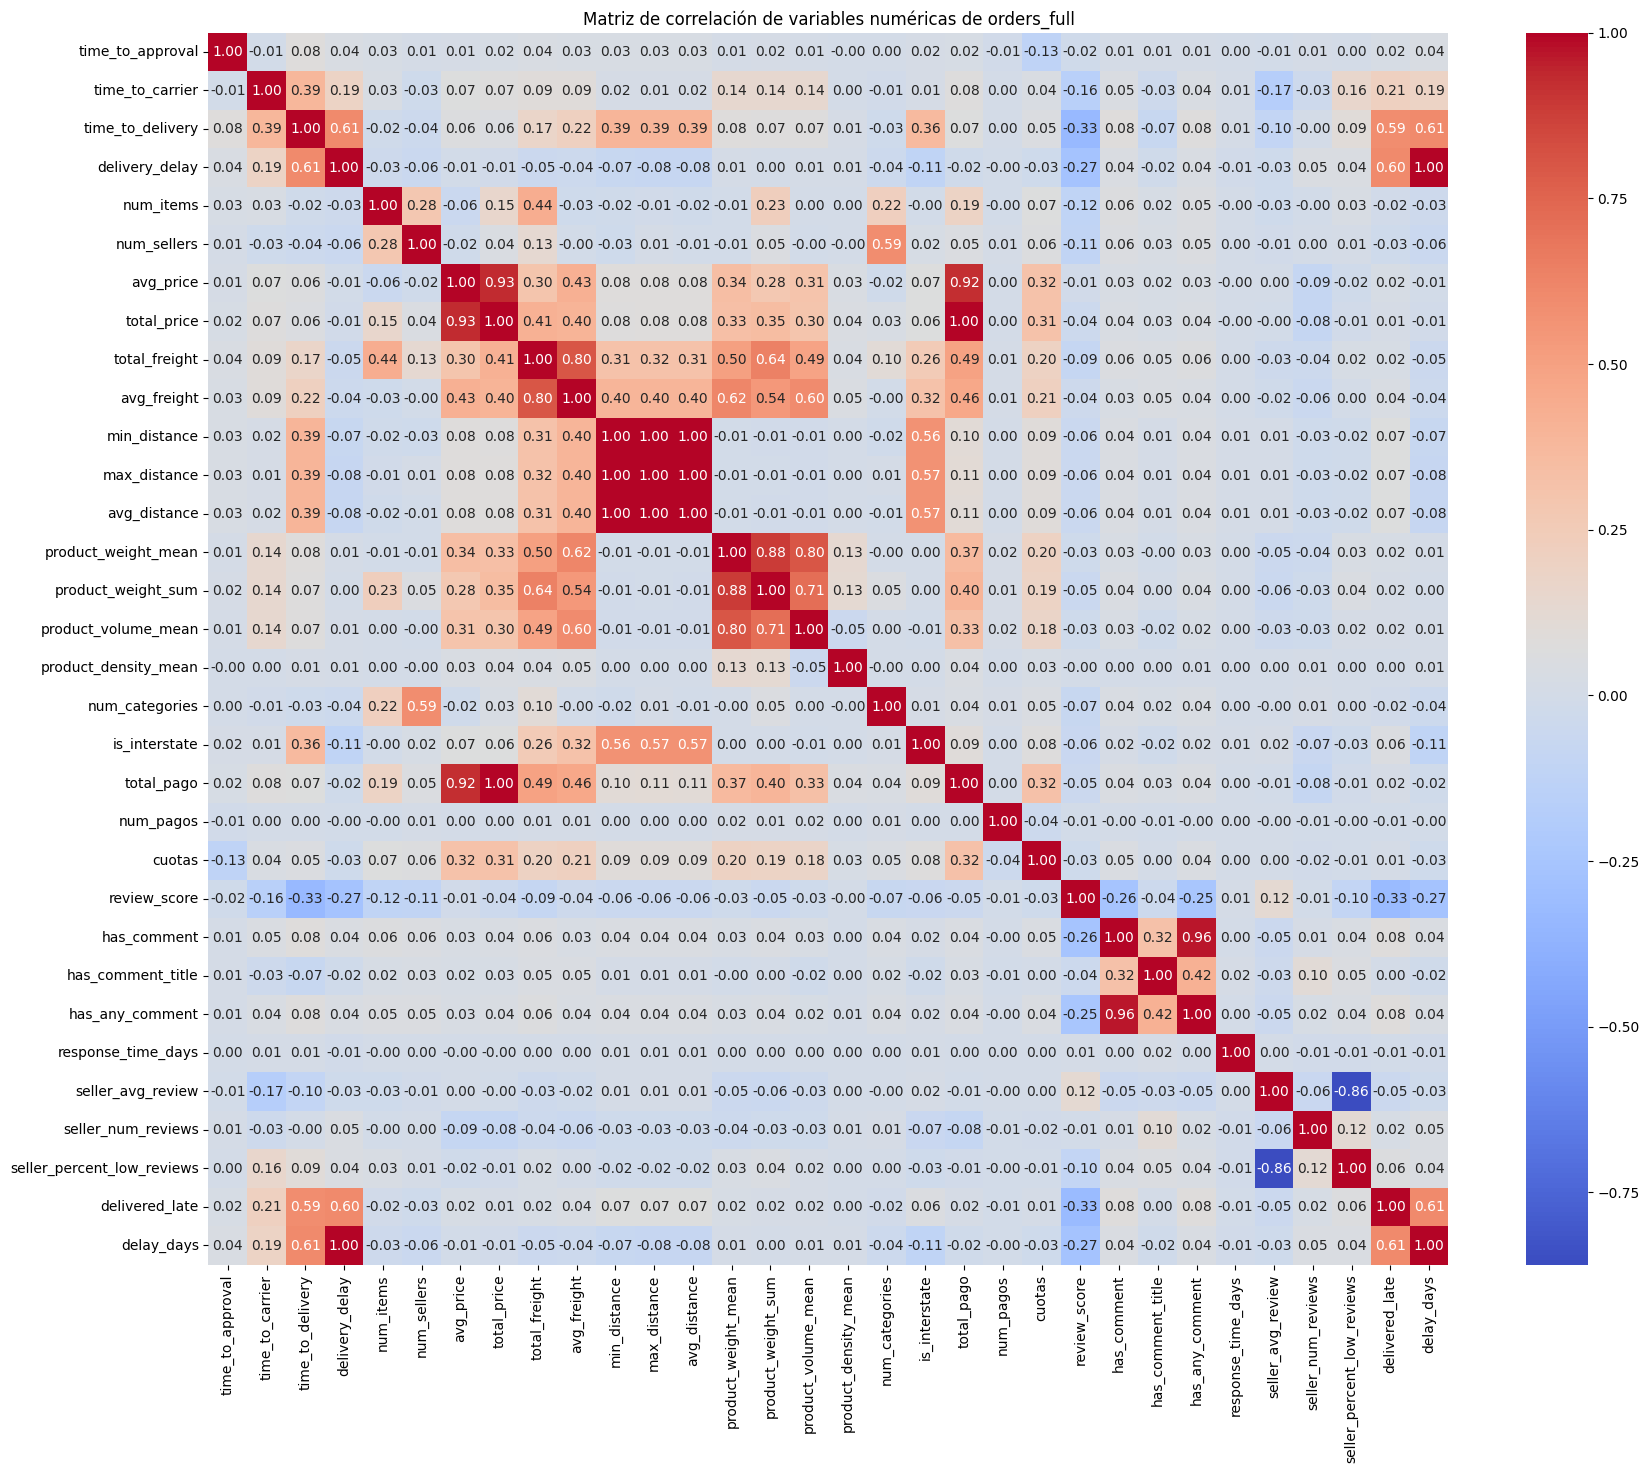

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo columnas numéricas
numeric_cols = orders_full.select_dtypes(include=['int64', 'float64']).columns
orders_numeric = orders_full[numeric_cols]

# Calcular matriz de correlación
corr_matrix = orders_numeric.corr()

# Mostrar matriz con heatmap
plt.figure(figsize=(20,16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Matriz de correlación de variables numéricas de orders_full")
plt.show()


In [ ]:
## Guardar el archivo
from google.colab import files

orders_full.to_csv('olist_orders_full.csv', index=False)

files.download("olist_orders_full.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# E. Modelos no Aplicados

* Modelos que se consideraron pero no se aplicaron

* Justificación

## E.1 Series temporales

- No es posible realizar un análisis de series temporales con descomposición estacional, ya que la base de datos solo cuenta con 22 meses de información. El método requiere al menos dos ciclos completos para estimar la estacionalidad; en este caso, con un ciclo anual (periodo = 12 meses) se necesitarían como mínimo 24 meses de datos..

In [ ]:
# Ver si el cliente hizo mas de una compra contnado cuántas compras hizo cada cliente
clientes_unicos = orders['customer_id'].nunique()
print(clientes_unicos)

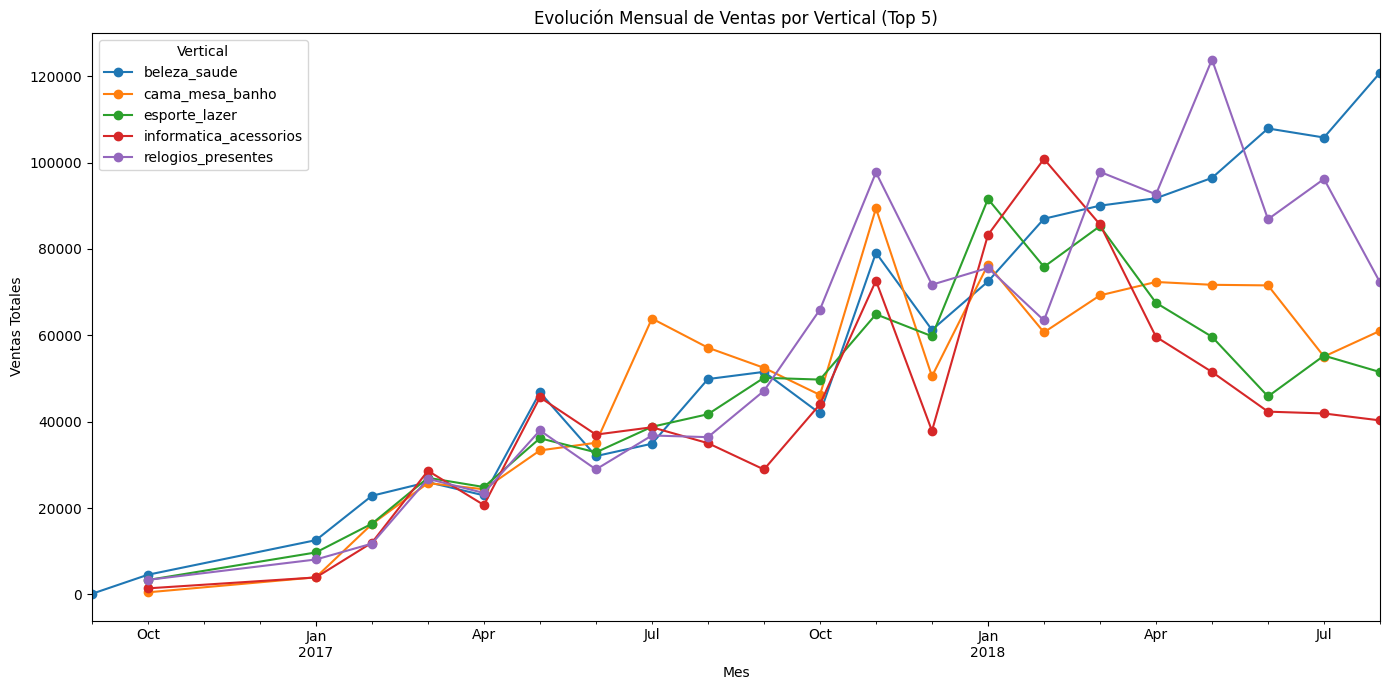

In [ ]:
# Unir order_items con products para obtener la categoría del producto
items_products = order_items.merge(products, on='product_id', how='left')

# Unir con orders para obtener la fecha de la orden
items_products_orders = items_products.merge(orders[['order_id', 'order_purchase_timestamp']], on='order_id', how='left')

# Convertir la fecha a datetime y extraer año-mes
items_products_orders['order_purchase_timestamp'] = pd.to_datetime(items_products_orders['order_purchase_timestamp'])
items_products_orders['year_month'] = items_products_orders['order_purchase_timestamp'].dt.to_period('M')

# Calcular ventas mensuales por vertical
monthly_sales = (
    items_products_orders.groupby(['year_month', 'product_category_name'])['price']
    .sum()
    .reset_index()
    .rename(columns={'price': 'total_sales'})
)

# Seleccionar las verticales más importantes (top 5 en ventas totales)
top_verticals = (
    monthly_sales.groupby('product_category_name')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filtrar solo las verticales top
monthly_sales_top = monthly_sales[monthly_sales['product_category_name'].isin(top_verticals)]

# Pivotear para graficar
pivot_sales = monthly_sales_top.pivot(index='year_month', columns='product_category_name', values='total_sales')

# Graficar evolución temporal
plt.figure(figsize=(14, 7))
pivot_sales.plot(ax=plt.gca(), marker='o')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')
plt.title('Evolución Mensual de Ventas por Vertical (Top 5)')
plt.legend(title='Vertical')
plt.tight_layout()
plt.show()

In [ ]:
print(pivot_sales.index.min(), pivot_sales.index.max())
print(len(pivot_sales))

2016-09-01 00:00:00 2018-08-01 00:00:00
22


In [ ]:
## Datos de 22 meses (no recomendable estacionalidad anual) Podemos probar otros ciclos, semanales, diarios

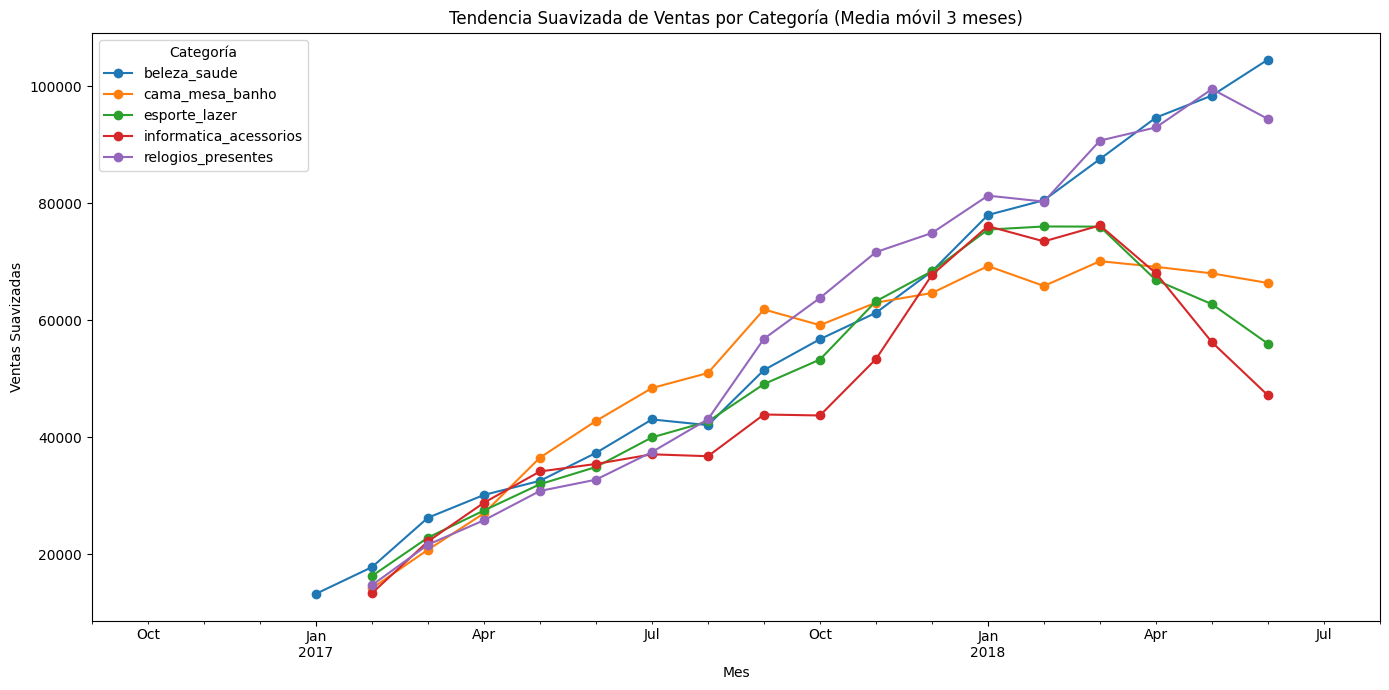

In [ ]:
# Suavizamos con media móvil de 3 meses
pivot_sales_smooth = pivot_sales.rolling(window=5, center=True).mean()

# Graficamos
plt.figure(figsize=(14, 7))
pivot_sales_smooth.plot(ax=plt.gca(), marker='o', linestyle='-')
plt.xlabel('Mes')
plt.ylabel('Ventas Suavizadas')
plt.title('Tendencia Suavizada de Ventas por Categoría (Media móvil 3 meses)')
plt.legend(title='Categoría')
plt.tight_layout()
plt.show()


## E.2 Otros

- No se puede hacer análisis de preferencia de compras por cliente por cantidad de compras individuales: la mayor parte de los clientes, solo realizó solo una compra.


# **F**. Predicción de Ventas por seller

## **Dada la complejidad del modelo, se analiza en Colab separado**

<font color="green" size="6"><b>Grupo12_Checkpoint_2_hipotesis</b></font>  


Se entrenan múltiples modelos de regresión (Linear, Ridge, Lasso, ElasticNet) y se selecciona el óptimo: **Lasso**.  
Objetivo: explicar y predecir el volumen de ventas usando características observables de cada seller.  
Para garantizar la validez del análisis implementamos un **pipeline de preprocessing seguro**, evitando el riesgo de *data leakage*.

# **G**. Segmentación y clasificación de sellers 🚧

<font color="#FFA500" size="4"><b>Sección en construcción</b></font>  
Se analizan características de los sellers (competitividad de precios, promedio de reviews, cantidad de órdenes, flete promedio) para **clasificarlos en categorías** y extraer insights sobre su comportamiento.  
Objetivo: entender perfiles de sellers y su relación con ventas y competitividad.

# **H**. Resultados y Evaluación 🚧

<font color="#FFA500" size="4"><b>Sección en construcción</b></font>


* Interpretación de métricas
* Visualizaciones de performance
* Discusión de hallazgos

# **I**. Conclusiones y Trabajo Futuro 🚧

<font color="#FFA500" size="4"><b>Sección en construcción</b></font>


* Resumen de lo aprendido
* Limitaciones del análisis
* Posibles mejoras o siguientes pasos

## I.1 Resumen Hallazgos
* Features mas influyentes ...




## I.2 Limitaciones

I.3 Próximos pasos

  - Probar combinaciones de modelos (ensembles)  
  - Evaluar nuevas features o variables externas  
  - Refinar hyperparámetros usando GridSearchCV o RandomSearch  
  - Validar la estabilidad del modelo en otros periodos o datasets  

# **J**. Referencias 🚧

<font color="#FFA500" size="4"><b>Sección en construcción</b></font>


* Papers, dataset, artículos usados